**List of Libraries used**

In [ ]:
!pip install gdown
import gdown
import pandas as pd
import os

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

**Import & Load Datasets**

In [ ]:
# Import Dataset
dataset_link = 'https://drive.google.com/drive/folders/1wLAk6IsUNCWhGENAmAUnmXZxLiiv7m4q?usp=sharing'
gdown.download_folder(dataset_link, quiet=True, use_cookies=False)

# Path Dataset
path = '/content/Dataset/'

# Get the data from Dataset Folder
csv_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
dataframes = {}

# Load each CSV file into a DataFrame
for file_name in csv_files:
    base_name = os.path.basename(file_name).replace('.csv', '')
    print(f"Load Path: {file_name} into DataFrame: {base_name}..")

    # Load the file and store it
    dataframes[base_name] = pd.read_csv(file_name)

print("\nList Dataset")
print(dataframes.keys())

Load Path: /content/Dataset/calendar.csv into DataFrame: calendar..
Load Path: /content/Dataset/reviews.csv into DataFrame: reviews..
Load Path: /content/Dataset/listings.csv into DataFrame: listings..

List Dataset
dict_keys(['calendar', 'reviews', 'listings'])


In [ ]:
dataframes['calendar']

listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
info_df_calendar = dataframes['calendar'].info()
info_df_calendar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
dataframes['reviews']

listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  2015-07-19     28943674        Bianca   
1         7202016  39087409  2015-07-20     32440555         Frank   
2         7202016  39820030  2015-07-26     37722850           Ian   
3         7202016  40813543  2015-08-02     33671805        George   
4         7202016  41986501  2015-08-10     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  2015-10-12     37419458          Ryan   
84845     3624990  51024875  2015-10-17      6933252         Linda   
84846     3624990  51511988  2015-10-20     19543701         Jaime   
84847     3624990  52814482  2015-11-02     24445024        Jørgen   
84848     9727246  56429621  2015-12-13     30860360     Stephanie   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kelly has a great room in a very central locat...  
2      Very spacious apartment, and in a great neighb...  
3      Close to Seattle Center and all it has to offe...  
4      Kelly was a great host and very accommodating ...  
...                                                  ...  
84844  The description and pictures of the apartment ...  
84845  We had an excellent stay. It was clean and com...  
84846  Gran ubicación, cerca de todo lo atractivo del...  
84847  Very good apartement, clean and well sized. Si...  
84848  Breanne was a great host. Check in was easy, s...  

[84849 rows x 6 columns]

In [ ]:
info_df_reviews = dataframes['reviews'].info()
info_df_reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [ ]:
dataframes['listings']

id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish Queen Anne Apartment   
1      2016-01-04   Bright & Airy Queen Anne Apartment   
2      2016-01-04  New Modern House-Amazing water view   
3      2016-01-04                   Queen Anne Chateau   
4      2016-01-04       Charming craftsman 3 bdm house   
...           ...                                  ...   
3813   2016-01-04   3BR Mountain View House in Seattle   
3814   2016-01-04    Portage Bay View!-One Bedroom Apt   
3815   2016-01-04    Private apartment view of Lake WA   
3816   2016-01-04    Amazing View with Modern Comfort!   
3817   2016-01-04            Large Lakefront Apartment   

                                                summary  \
0                                                   NaN   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
0     Make your self at home in this charming one-be...   
1     Beautiful, hypoallergenic apartment in an extr...   
2     Our house is modern, light and fresh with a wa...   
3                                                   NaN   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
0     Make your self at home in this charming one-be...                none   
1     Chemically sensitive? We've removed the irrita...                none   
2     New modern house built in 2013.  Spectacular s...                none   
3     A charming apartment that sits atop Queen Anne...                none   
4     Cozy family craftman house in beautiful neighb...                none   
...                                                 ...                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  ...  \
0      

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
(dataframes['listings'])

id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish Queen Anne Apartment   
1      2016-01-04   Bright & Airy Queen Anne Apartment   
2      2016-01-04  New Modern House-Amazing water view   
3      2016-01-04                   Queen Anne Chateau   
4      2016-01-04       Charming craftsman 3 bdm house   
...           ...                                  ...   
3813   2016-01-04   3BR Mountain View House in Seattle   
3814   2016-01-04    Portage Bay View!-One Bedroom Apt   
3815   2016-01-04    Private apartment view of Lake WA   
3816   2016-01-04    Amazing View with Modern Comfort!   
3817   2016-01-04            Large Lakefront Apartment   

                                                summary  \
0                                                   NaN   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
0     Make your self at home in this charming one-be...   
1     Beautiful, hypoallergenic apartment in an extr...   
2     Our house is modern, light and fresh with a wa...   
3                                                   NaN   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
0     Make your self at home in this charming one-be...                none   
1     Chemically sensitive? We've removed the irrita...                none   
2     New modern house built in 2013.  Spectacular s...                none   
3     A charming apartment that sits atop Queen Anne...                none   
4     Cozy family craftman house in beautiful neighb...                none   
...                                                 ...                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  \
0           

In [ ]:
unique_property_types = dataframes['listings']['property_type'].unique()
print(unique_property_types)

['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]


In [ ]:
info_df_listings  = dataframes['listings'].info()
info_df_listings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Data Cleaning

In [ ]:
r_data=pd.read_csv('/content/Dataset/reviews.csv')
c_data=pd.read_csv('/content/Dataset/calendar.csv')
l_data=pd.read_csv('/content/Dataset/listings.csv')

In [ ]:
r_data.head(10)

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   
5     7202016  43979139  2015-08-23      1154501        Barent   
6     7202016  45265631  2015-09-01     37853266         Kevin   
7     7202016  46749120  2015-09-13     24445447          Rick   
8     7202016  47783346  2015-09-21       249583          Todd   
9     7202016  48388999  2015-09-26     38110731       Tatiana   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
5  Kelly was great, place was great, just what I ...  
6  Kelly was great! Very nice and the neighborhoo...  
7  hola all bnb erz - Just left Seattle where I h...  
8  Kelly's place is conveniently located on a qui...  
9  The place was really nice, clean, and the most...

In [ ]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [ ]:
r_data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

<Axes: >

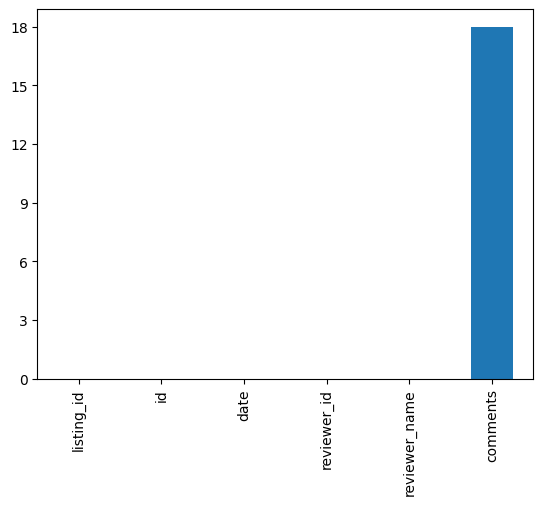

In [ ]:
y=np.array([0,19])
plt.yticks(np.arange(y.min(), y.max(), 3))
r_data.isnull().sum().plot(kind='bar')

In [ ]:
l_data.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [ ]:
l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
l_data.describe(include='all')

id                          listing_url     scrape_id  \
count   3.818000e+03                                 3818  3.818000e+03   
unique           NaN                                 3818           NaN   
top              NaN  https://www.airbnb.com/rooms/241032           NaN   
freq             NaN                                    1           NaN   
mean    5.550111e+06                                  NaN  2.016010e+13   
std     2.962660e+06                                  NaN  0.000000e+00   
min     3.335000e+03                                  NaN  2.016010e+13   
25%     3.258256e+06                                  NaN  2.016010e+13   
50%     6.118244e+06                                  NaN  2.016010e+13   
75%     8.035127e+06                                  NaN  2.016010e+13   
max     1.034016e+07                                  NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3818   
unique            1                    3792   
top      2016-01-04  Capitol Hill Apartment   
freq           3818                       3   
mean            NaN                     NaN   
std             NaN                     NaN   
min             NaN                     NaN   
25%             NaN                     NaN   
50%             NaN                     NaN   
75%             NaN                     NaN   
max             NaN                     NaN   

                                                  summary  \
count                                                3641   
unique                                               3478   
top     This is a modern fully-furnished studio apartm...   
freq                                                   15   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    space  \
count                                                3249   
unique                                               3119   
top     *Note: This fall, there will be major renovati...   
freq                                                   14   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                                3818                3818   
unique                                               3742                   1   
top     Our space is a mix of a hostel and a home. We ...                none   
freq                                                   10                3818   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                                    neighborhood_overview  \
count                                               

In [ ]:
l_data.isnull().sum()[l_data.isnull().sum() != 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3721
weekly_price                   1809
monthly_price                  2301
security_deposit               1952
cleaning_fee                   1030
first_review                    627
last_review                     627
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
license                        3818
reviews_per_month               627
dtype: int64

In [ ]:
l_data.isnull().sum()[l_data.isnull().sum() > 0].index

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'zipcode', 'property_type', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [ ]:
type(l_data.isnull().sum()[l_data.isnull().sum() > 0].index)

pandas.core.indexes.base.Index

<Axes: xlabel='None'>

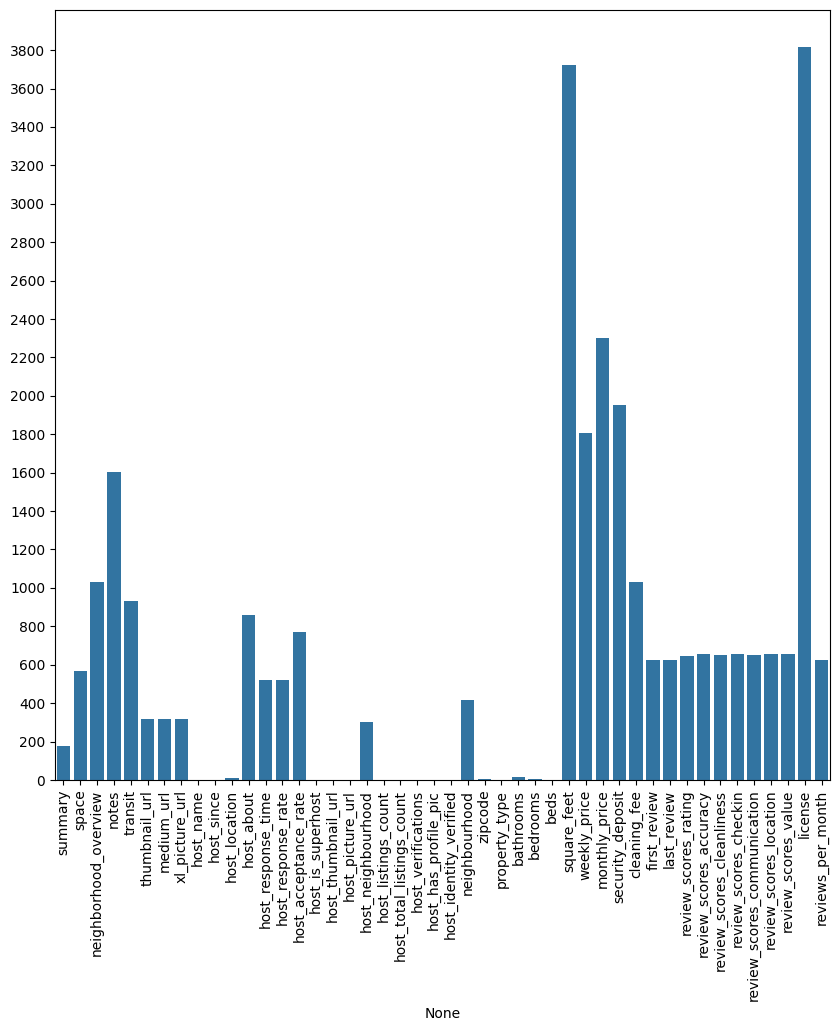

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))

null_counts = l_data.isnull().sum()

null_columns = null_counts[null_counts > 0]

sns.barplot(x=null_columns.index, y=null_columns.values)

In [ ]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
c_data.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

<Axes: >

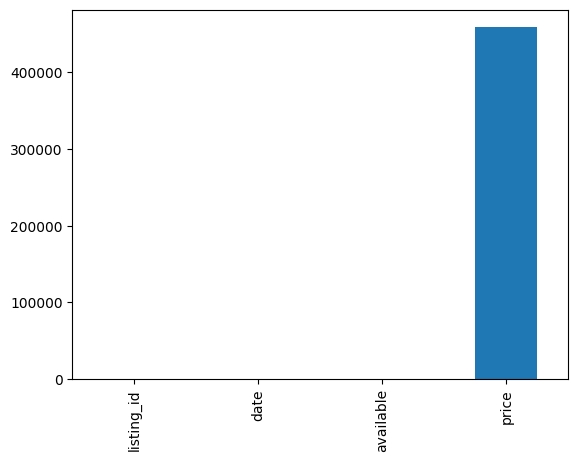

In [ ]:
c_data.isnull().sum().plot(kind='bar')

Setelah melihat kumpulan data dan menghitung nilai nol, kita melanjutkan untuk menghapus nilai nol dari kumpulan data.
Kita melihat bahwa r_data dan c_data masing-masing memiliki salah satu baris price dan comments masing-masing tanpa banyak titik data yang hilang.
Kita menghapus seluruh baris darinya.
Dan id l_data diubah namanya menjadi listing_id untuk memudahkan pemahaman antara berbagai kumpulan data.

Removing null values

In [ ]:
c_data.dropna(axis=0,subset=['price'],inplace=True)
r_data.dropna(axis=0,subset=['comments'],inplace=True)

In [ ]:
l_data=l_data.rename(columns={'id':'listing_id'})

Data Cleaning

In [ ]:
l_data.head()

listing_id                           listing_url       scrape_id  \
0      241032   https://www.airbnb.com/rooms/241032  20160104002432   
1      953595   https://www.airbnb.com/rooms/953595  20160104002432   
2     3308979  https://www.airbnb.com/rooms/3308979  20160104002432   
3     7421966  https://www.airbnb.com/rooms/7421966  20160104002432   
4      278830   https://www.airbnb.com/rooms/278830  20160104002432   

  last_scraped                                 name  \
0   2016-01-04         Stylish Queen Anne Apartment   
1   2016-01-04   Bright & Airy Queen Anne Apartment   
2   2016-01-04  New Modern House-Amazing water view   
3   2016-01-04                   Queen Anne Chateau   
4   2016-01-04       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                         

In [ ]:
l_data['monthly_price'] = pd.to_numeric(l_data['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['price'] = pd.to_numeric(l_data['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['weekly_price'] = pd.to_numeric(l_data['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['security_deposit'] = pd.to_numeric(l_data['security_deposit'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['cleaning_fee'] = pd.to_numeric(l_data['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['extra_people'] = pd.to_numeric(l_data['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['host_response_rate'] = pd.to_numeric(l_data['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
                                        ,errors='coerce')

In [ ]:
l_data['host_since']=pd.to_datetime(l_data['host_since'])
l_data['month']=l_data.host_since.dt.month
l_data['year']=l_data.host_since.dt.year

In [ ]:
cl_data=l_data.merge(c_data,on='listing_id')

In [ ]:
c_data['date']=pd.to_datetime(c_data['date'])
c_data['month']=c_data.date.dt.month
c_data['year']=c_data.date.dt.year

In [ ]:
c_data['price'] = pd.to_numeric(c_data['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')

In [ ]:
l_data2=l_data._get_numeric_data()
l_data2.head()

listing_id       scrape_id   host_id  host_response_rate  \
0      241032  20160104002432    956883                96.0   
1      953595  20160104002432   5177328                98.0   
2     3308979  20160104002432  16708587                67.0   
3     7421966  20160104002432   9851441                 NaN   
4      278830  20160104002432   1452570               100.0   

   host_listings_count  host_total_listings_count   latitude   longitude  \
0                  3.0                        3.0  47.636289 -122.371025   
1                  6.0                        6.0  47.639123 -122.365666   
2                  2.0                        2.0  47.629724 -122.369483   
3                  1.0                        1.0  47.638473 -122.369279   
4                  2.0                        2.0  47.632918 -122.372471   

   accommodates  bathrooms  bedrooms  beds  square_feet  price  weekly_price  \
0             4        1.0       1.0   1.0          NaN   85.0           NaN   
1             4        1.0       1.0   1.0          NaN  150.0        1000.0   
2            11        4.5       5.0   7.0          NaN  975.0           NaN   
3             3        1.0       0.0   2.0          NaN  100.0         650.0   
4             6        2.0       3.0   3.0          NaN  450.0           NaN   

   monthly_price  security_deposit  cleaning_fee  guests_included  \
0            NaN               NaN           NaN                2   
1         3000.0             100.0          40.0                1   
2            NaN            1000.0         300.0               10   
3         2300.0               NaN           NaN                1   
4            NaN             700.0         125.0                6   

   extra_people  minimum_nights  maximum_nights  availability_30  \
0           5.0               1             365               14   
1           0.0               2              90               13   
2          25.0               4              30                1   
3           0.0               1            1125                0   
4          15.0               1            1125               30   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               41               71               346                207   
1               13               16               291                 43   
2                6               17               220                 20   
3                0                0               143                  0   
4               60               90               365                 38   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  95.0                    10.0                       10.0   
1                  96.0                    10.0                       10.0   
2                  97.0                    10.0                       10.0   
3                   NaN                     NaN                        NaN   
4                  92.0                     9.0                        9.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                     9.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                    10.0   
3                    NaN                          NaN                     NaN   
4                   10.0                         10.0                     9.0   

   review_scores_value  license  calculated_host_listings_count  \
0                 10.0      NaN                               2   
1                 10.0      NaN                               6   
2                 10.0      NaN                               2   
3                  NaN      NaN                               1   
4                  9.0      NaN                               1   

   reviews_per_month  month    year  
0       

Di sini kita mengganti nama berbagai kolom l_data yang mengonversi tipe string/tipe objek menjadi numerik.
Demikian pula c_data juga dibersihkan.
Simbol yang tidak diinginkan pada kolom akan dihapus.

VISUALIZATION TO DRAW INFERENCES ON DATASET.

USING HIST FUNCTION PLOTTING TOTAL NO OF LISTINGS IN PRICE RANGES.

(array([1.339e+03, 1.600e+03, 4.520e+02, 2.180e+02, 7.500e+01, 7.200e+01,
        2.400e+01, 1.200e+01, 1.200e+01, 1.000e+00, 4.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00]),
 array([  20.        ,   85.33333333,  150.66666667,  216.        ,
         281.33333333,  346.66666667,  412.        ,  477.33333333,
         542.66666667,  608.        ,  673.33333333,  738.66666667,
         804.        ,  869.33333333,  934.66666667, 1000.        ]),
 <BarContainer object of 15 artists>)

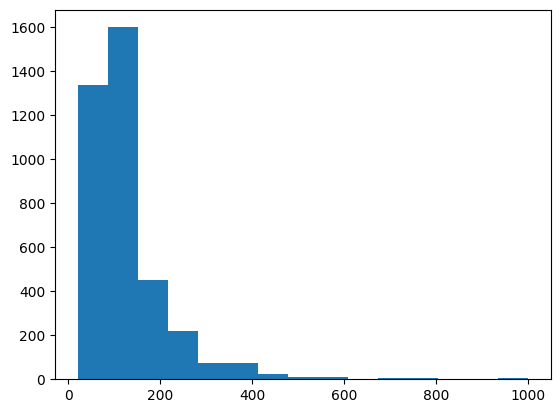

In [ ]:
plt.hist(l_data['price'],bins=15)

Jumlah maksimum listing berada dalam kisaran harga 0-200 dolar.

Counting the total no of listing by location in Seattle city

In [ ]:
l_data['neighbourhood_cleansed'].value_counts().head(15)

neighbourhood_cleansed
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_cleansed'>

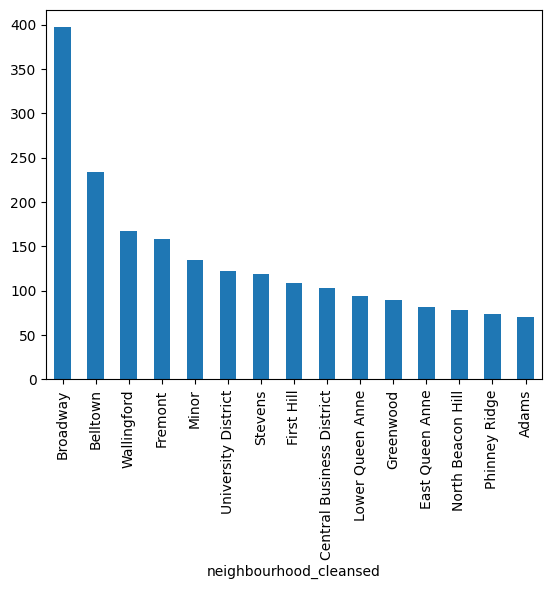

In [ ]:
l_data['neighbourhood_cleansed'].value_counts().head(15).plot(kind='bar')

Broadway Belttown memiliki jumlah listing maksimum.

Using Maps To Analyse The Spread of Listings In Seattle City and Relation of Neighbourhood with Price Plotted on MAP.

In [ ]:
len(l_data2['latitude'])

3818

In [ ]:
m = folium.Map(location=[47.60, -122.24], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             l_data2[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data).add_to(m)

m

Heatmap of Seattle using folium shows the distribution of listings across the city .

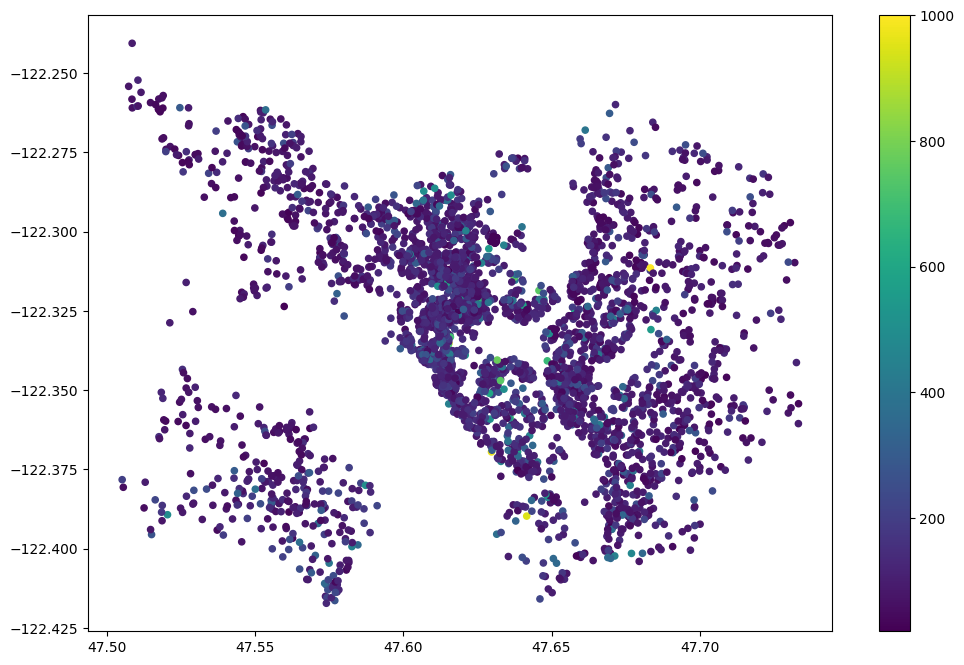

In [ ]:
plt.figure(figsize=(12,8))
points = plt.scatter(l_data2['latitude'], l_data2['longitude'], c=l_data["price"], s=20, cmap="viridis")
plt.colorbar(points)

Distribusi Harga listing kota Seattle yang menunjukkan bahwa jumlah maksimum listing memiliki harga antara 0 -200 dolar.
Juga jumlah maksimal listing yang memiliki harga lebih tinggi dari 200 tentu lebih banyak di pusat kota.

Plotting Neighbourhood with price, room type ,property type to draw any possible conculsion

<Axes: xlabel='neighbourhood_cleansed', ylabel='property_type'>

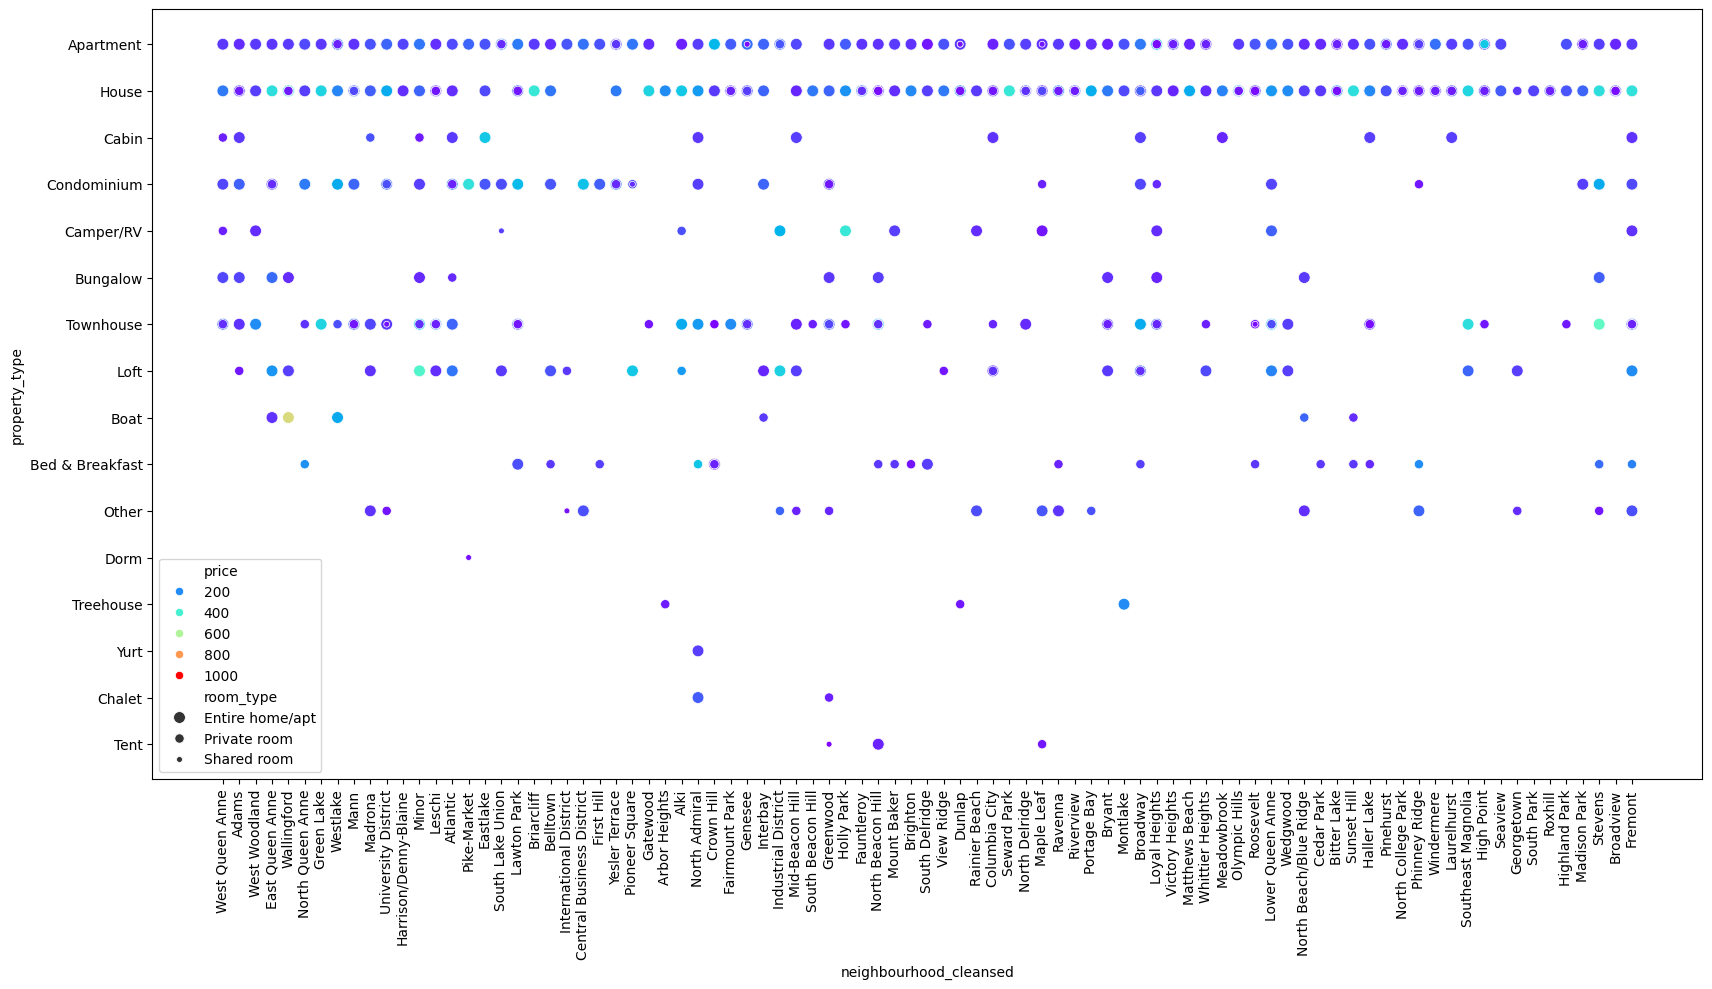

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x='neighbourhood_cleansed',hue='price',size='room_type',y='property_type',palette='rainbow',data=l_data)

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

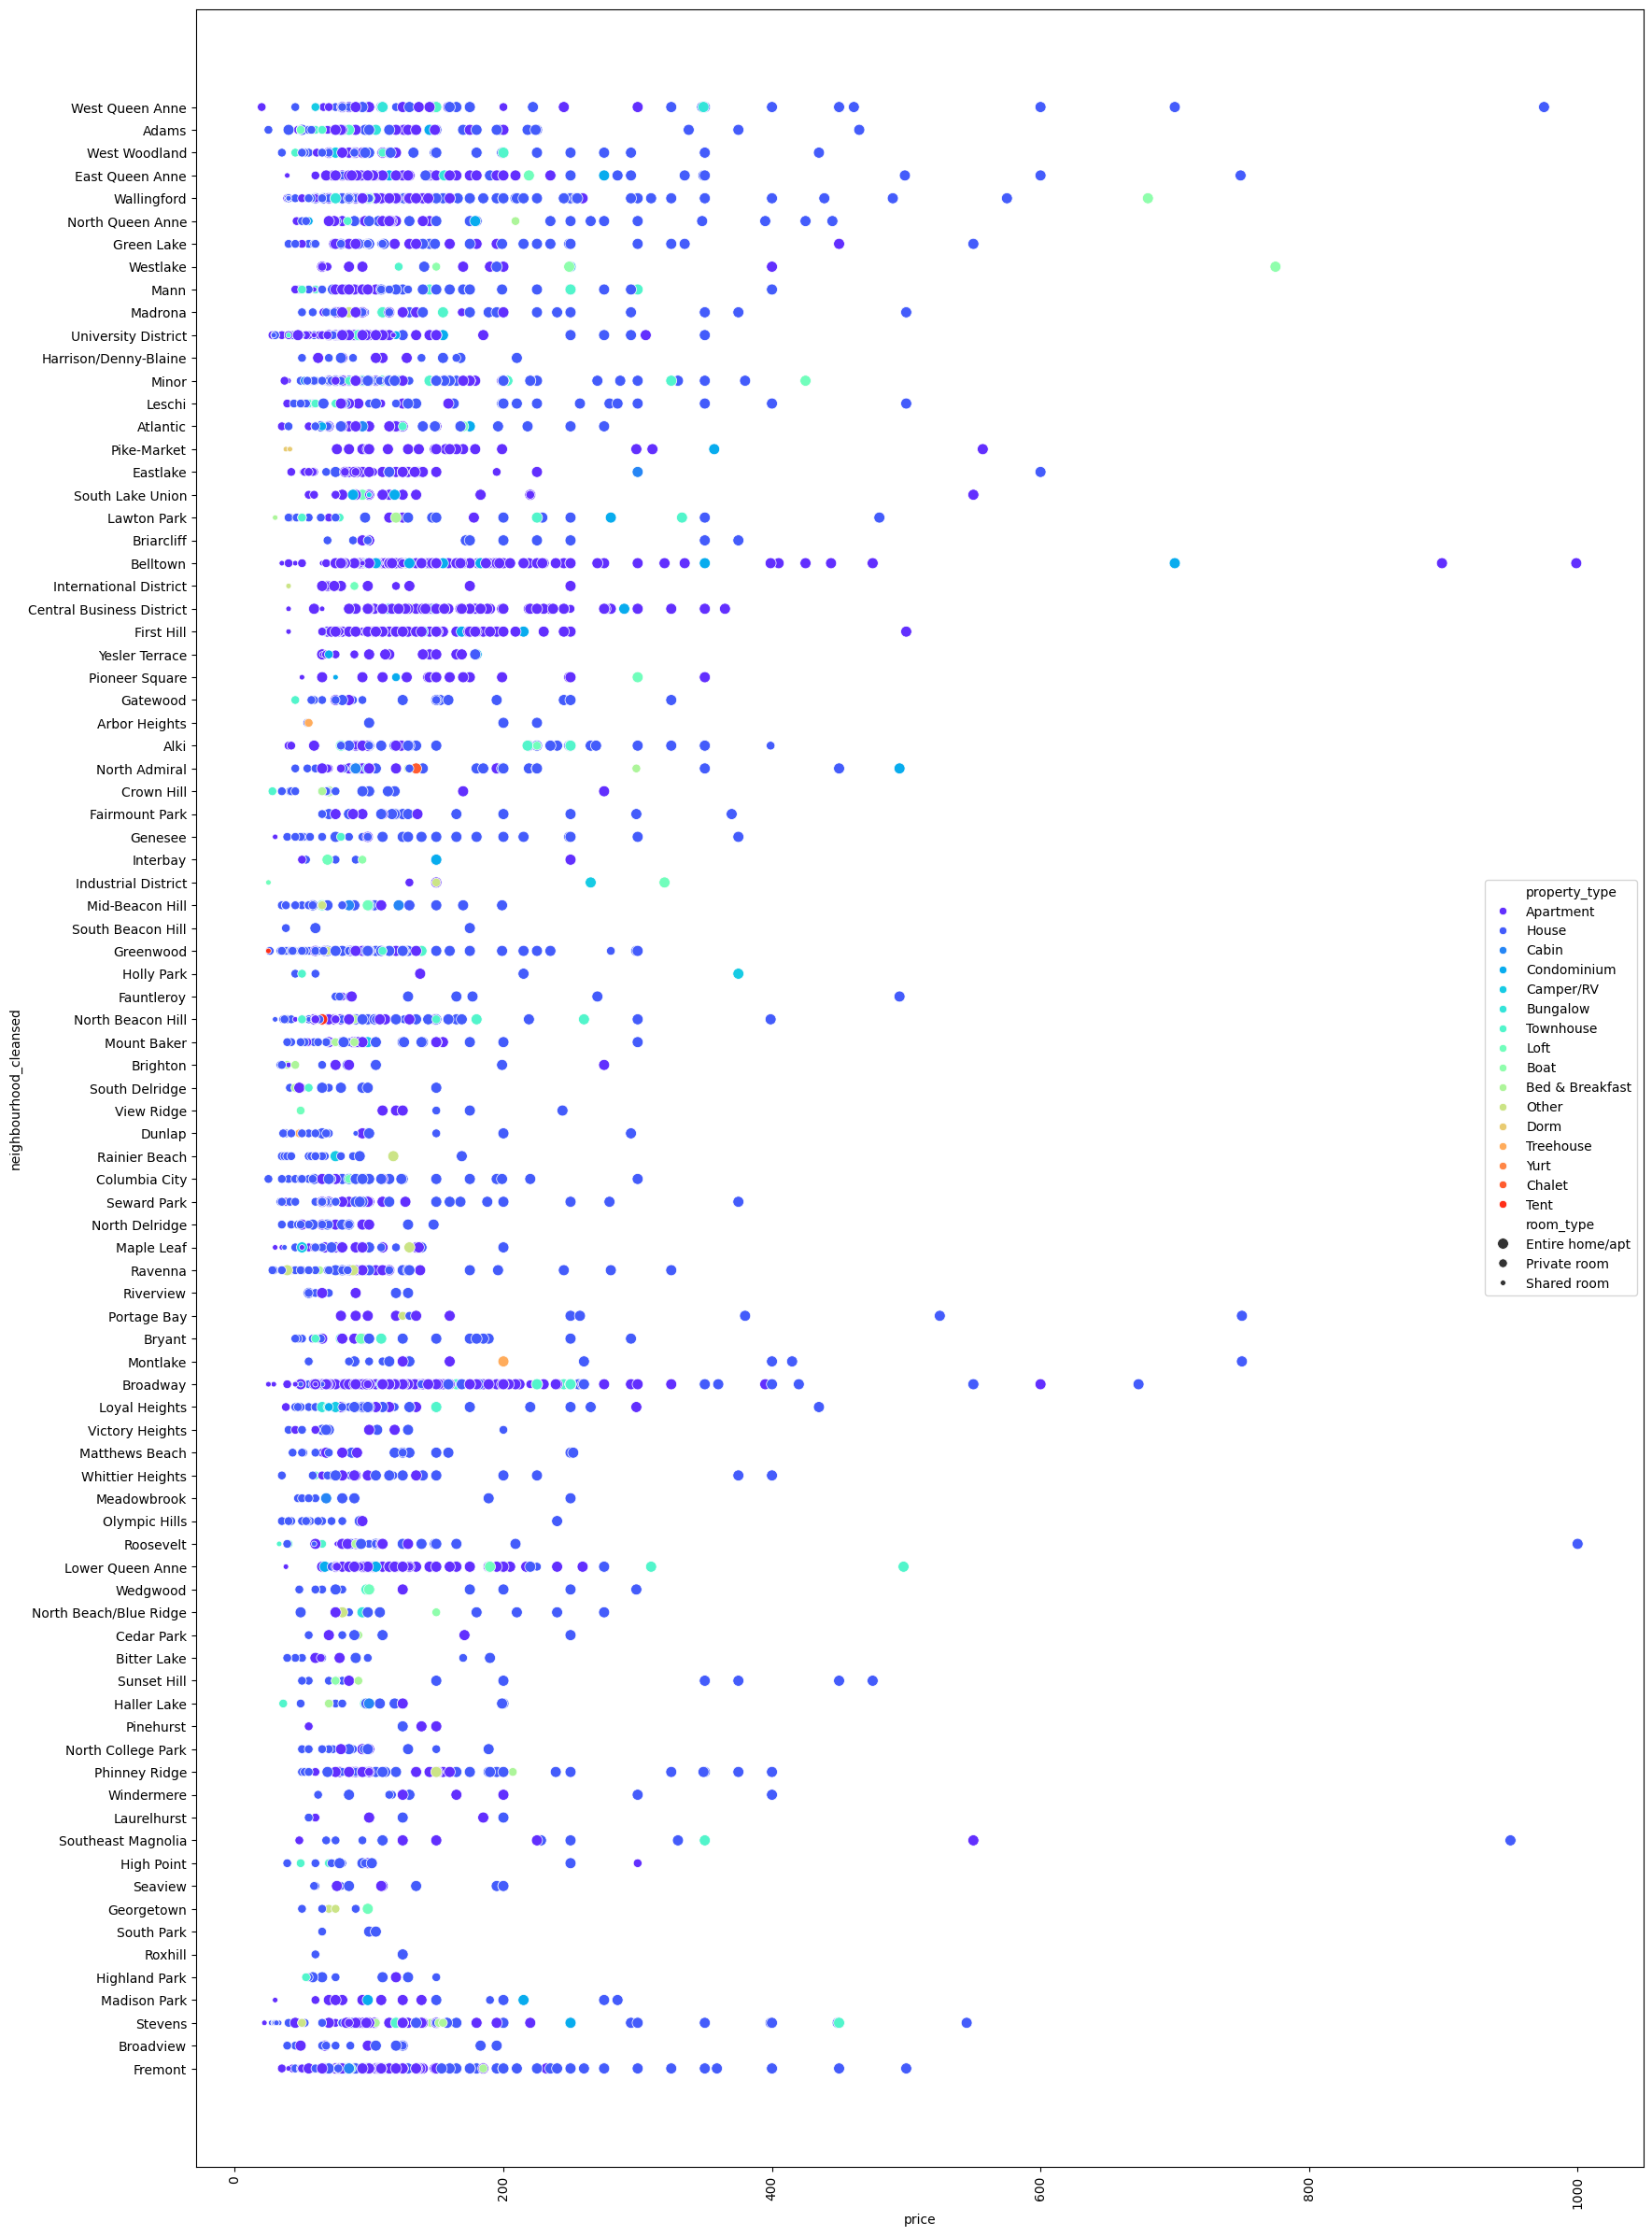

In [ ]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='neighbourhood_cleansed',x='price',size='room_type',hue='property_type',palette='rainbow',data=l_data)

<Axes: xlabel='latitude', ylabel='longitude'>

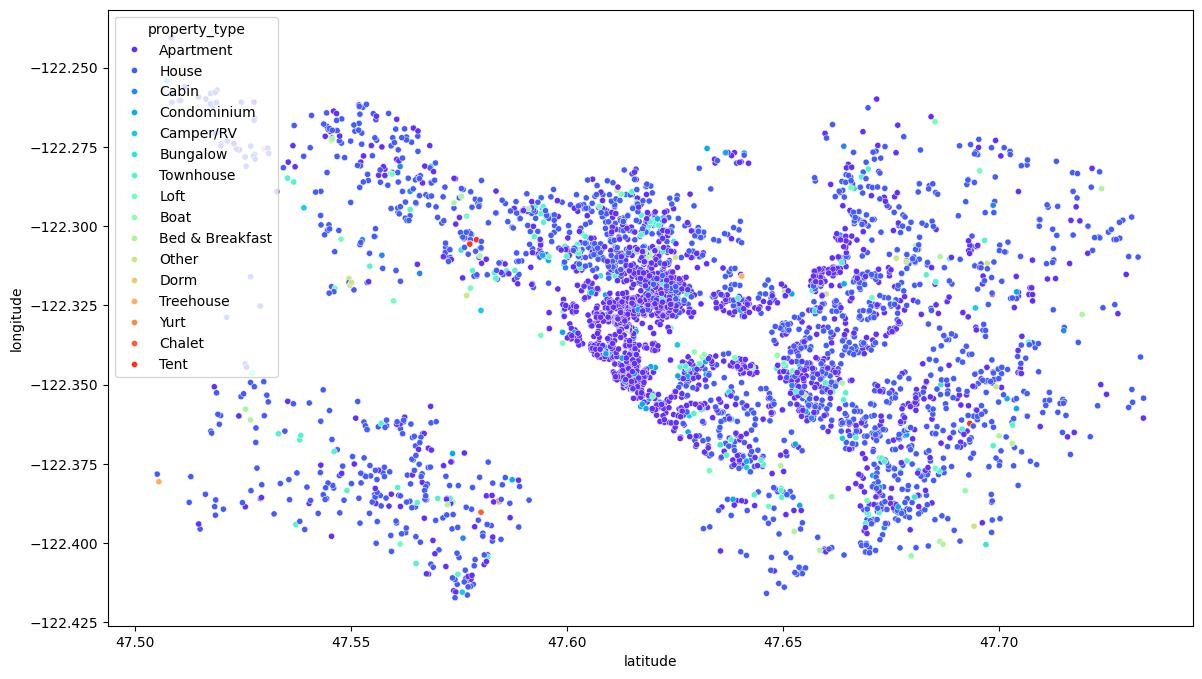

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=l_data2['latitude'], y=l_data2['longitude'], hue=l_data["property_type"], s=20, palette="rainbow")

Kita melihat bahwa jumlah maksimum Apartemen, Rumah yang dialokasikan secara keseluruhan.
Kisaran Harga antara 0-200 di sebagian besar tempat.
Distribusi Listing seperti Bunglow,Townhouse,Loft sebagian besar lebih banyak di
rasio di pinggiran kota dimana tempat wisata memungkinkan.
Namun pusat kota didominasi oleh apartemen dan rumah.

Working on host response time to draw ay conclusion.

In [ ]:
l_data['host_response_time'].value_counts()

host_response_time
within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='host_response_time'>

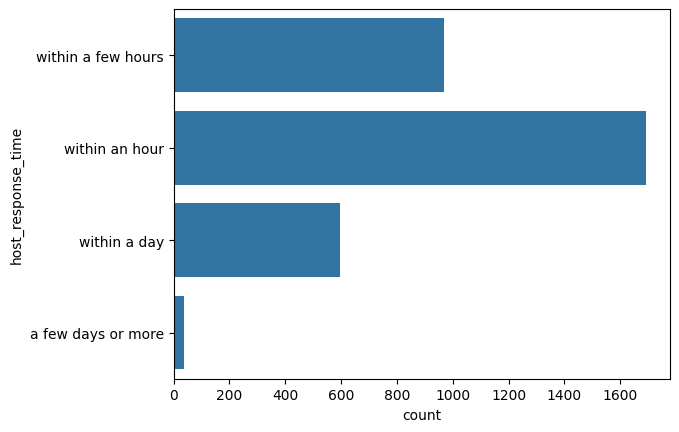

In [ ]:
sns.countplot(l_data['host_response_time'])

Kita melihat bahwa pemilik maksimum merespons dalam waktu satu jam.

<Axes: xlabel='host_response_time', ylabel='property_type'>

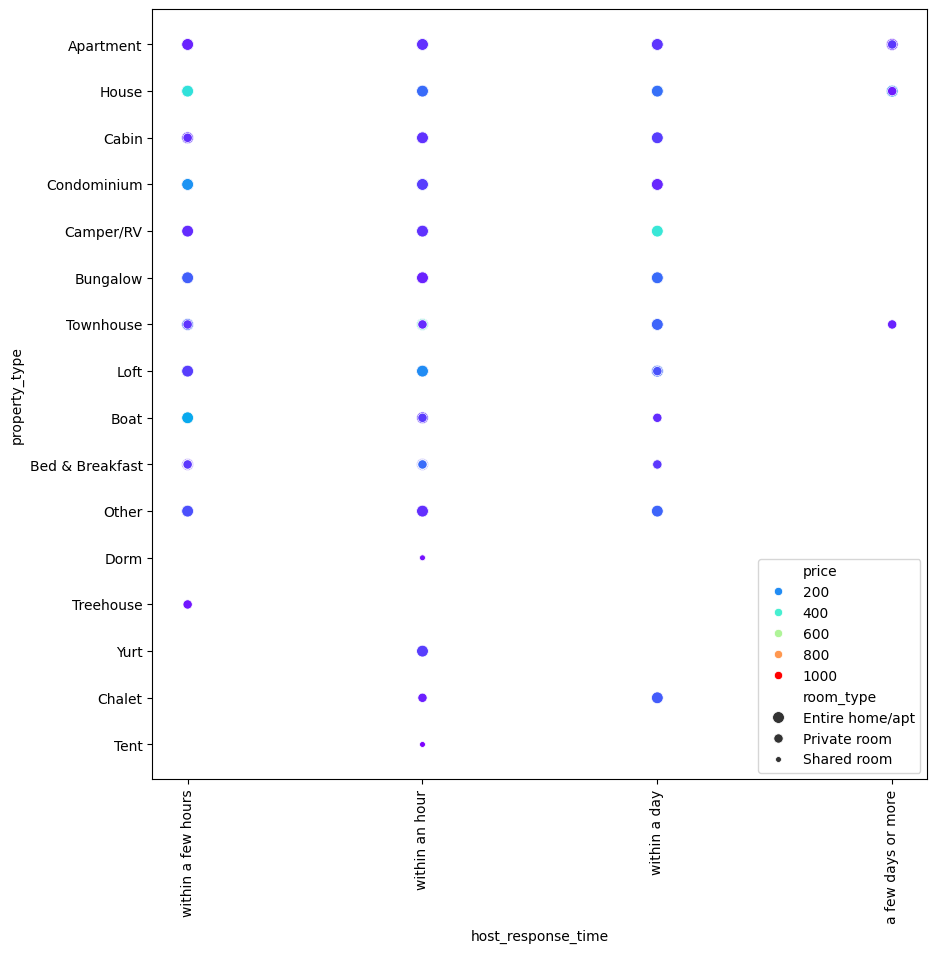

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_time',hue='price',size='room_type',y='property_type',palette='rainbow',data=l_data)

<Axes: xlabel='price', ylabel='host_response_time'>

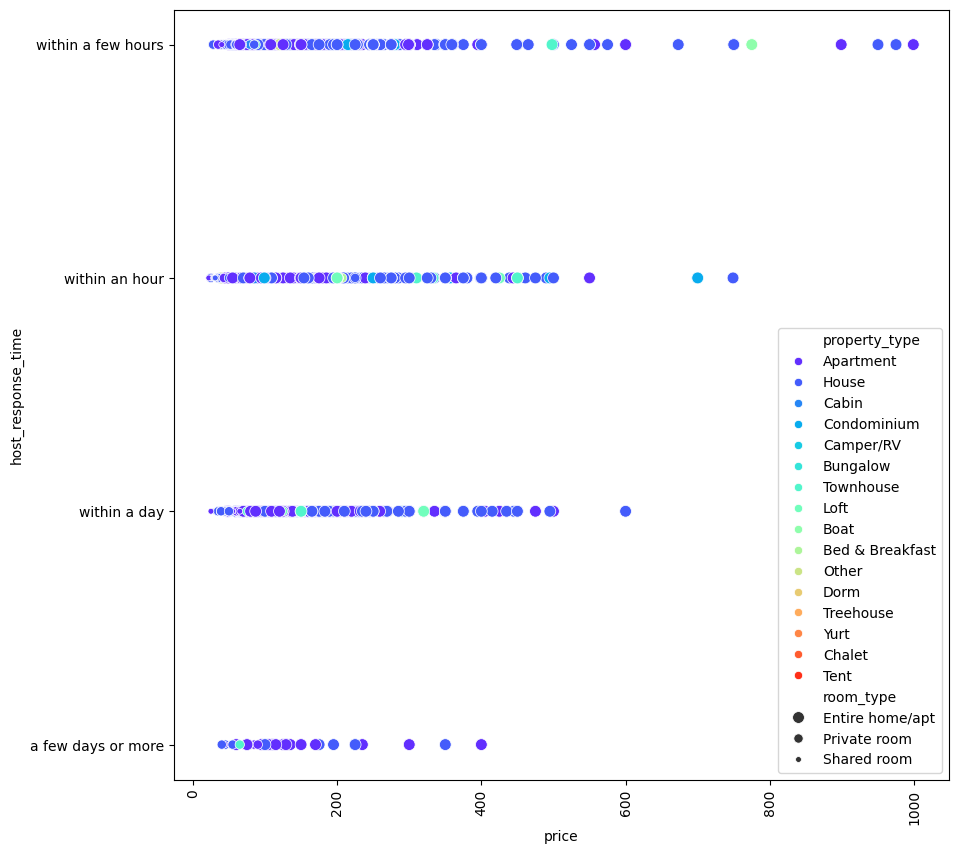

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(y='host_response_time',x='price',size='room_type',hue='property_type',palette='rainbow',data=l_data)

<Axes: xlabel='latitude', ylabel='longitude'>

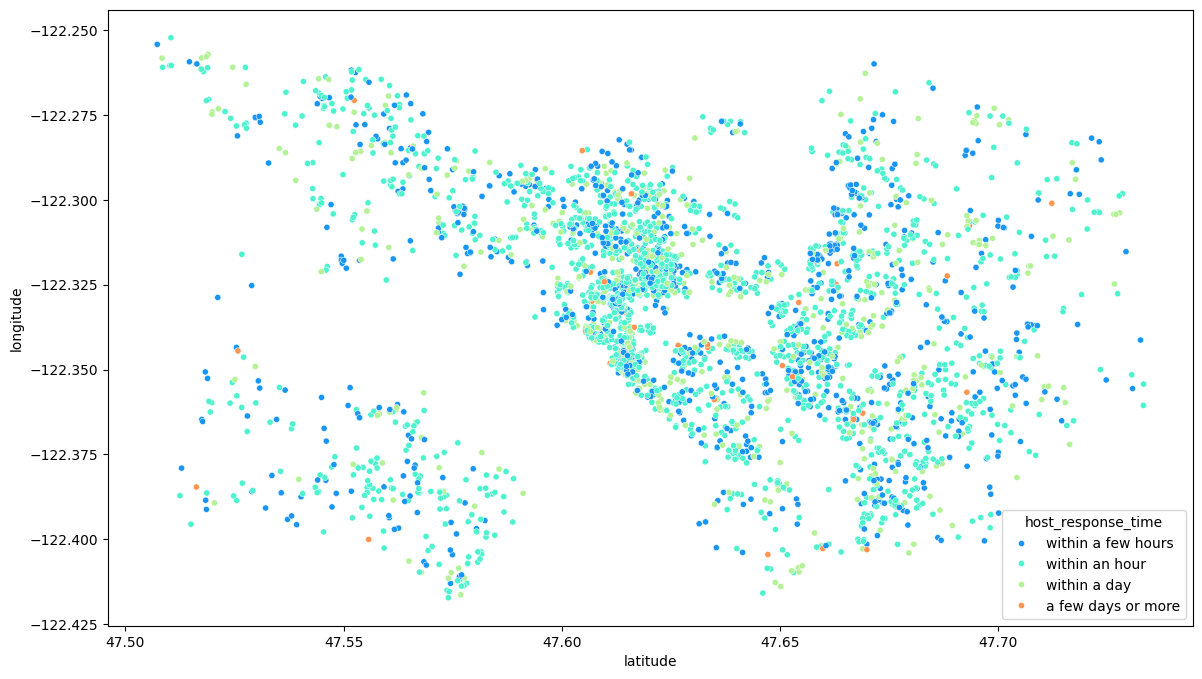

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=l_data2['latitude'], y=l_data2['longitude'], hue=l_data["host_response_time"], s=20, palette="rainbow")

Kami melihat bahwa waktu respons sedikit berbeda berdasarkan tipe properti.
Namun tidak ada pola yang mungkin terjadi dengan perbedaan harga atau tipe properti, jadi ini mungkin berarti bahwa waktu respons tuan rumah sangat bergantung pada individu.
Namun kami melihat bahwa biasanya dibutuhkan waktu satu jam di pusat kota.
Dan dalam beberapa hari di pinggiran kota.
Hal ini mungkin berarti perencanaan bisnis yang seharusnya lebih terencana di pusat kota.

In [ ]:
l_data['host_location'].value_counts().head(20)

host_location
Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
Bellevue, Washington, United States           12
San Francisco, California, United States      11
Mercer Island, Washington, United States      10
Kirkland, Washington, United States            8
New York, New York, United States              6
Seattle                                        5
Shoreline, Washington, United States           5
Sammamish, Washington, United States           5
Vashon, Washington, United States              5
Vancouver, Washington, United States           4
San Diego, California, United States           4
Portland, Oregon, United States                4
Seattle, Washington                            4
Tucson, Arizona, United States                 4
Vancouver, British Columbia, Canada            3
Name: count, dtype: int64

<Axes: xlabel='host_location'>

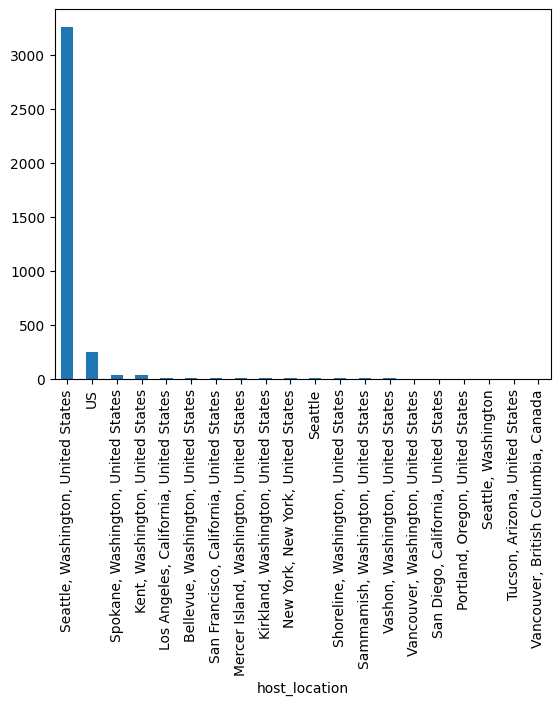

In [ ]:
l_data['host_location'].value_counts().head(20).plot(kind='bar')

Kami melihat bahwa sebagian besar lokasi pemilik properti berada di Seattle dan pemilik properti  lainnya sebagian besar berasal dari tempat terdekat di Washington dan California.

In [ ]:
l_data['host_response_rate'].value_counts()

host_response_rate
100.0    2371
90.0      165
80.0      104
99.0       78
88.0       66
50.0       52
94.0       46
67.0       41
75.0       32
89.0       32
86.0       30
98.0       28
96.0       28
70.0       25
97.0       21
60.0       20
83.0       20
93.0       18
92.0       18
33.0       14
40.0       12
63.0       11
71.0        8
95.0        8
78.0        8
91.0        5
43.0        4
64.0        3
76.0        3
87.0        3
25.0        3
57.0        2
82.0        2
17.0        2
58.0        2
53.0        1
65.0        1
69.0        1
68.0        1
30.0        1
56.0        1
38.0        1
81.0        1
31.0        1
55.0        1
Name: count, dtype: int64

<Axes: xlabel='host_response_rate', ylabel='property_type'>

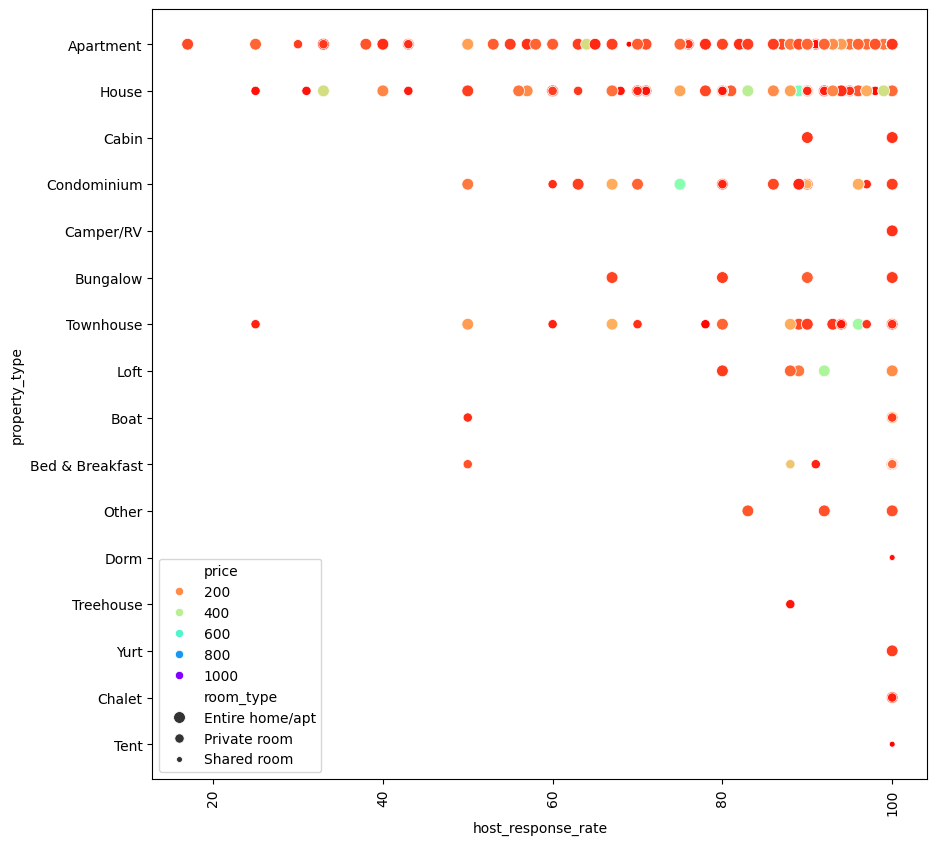

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_rate',hue='price',size='room_type',y='property_type',palette='rainbow_r',data=l_data)

<Axes: xlabel='price', ylabel='host_response_rate'>

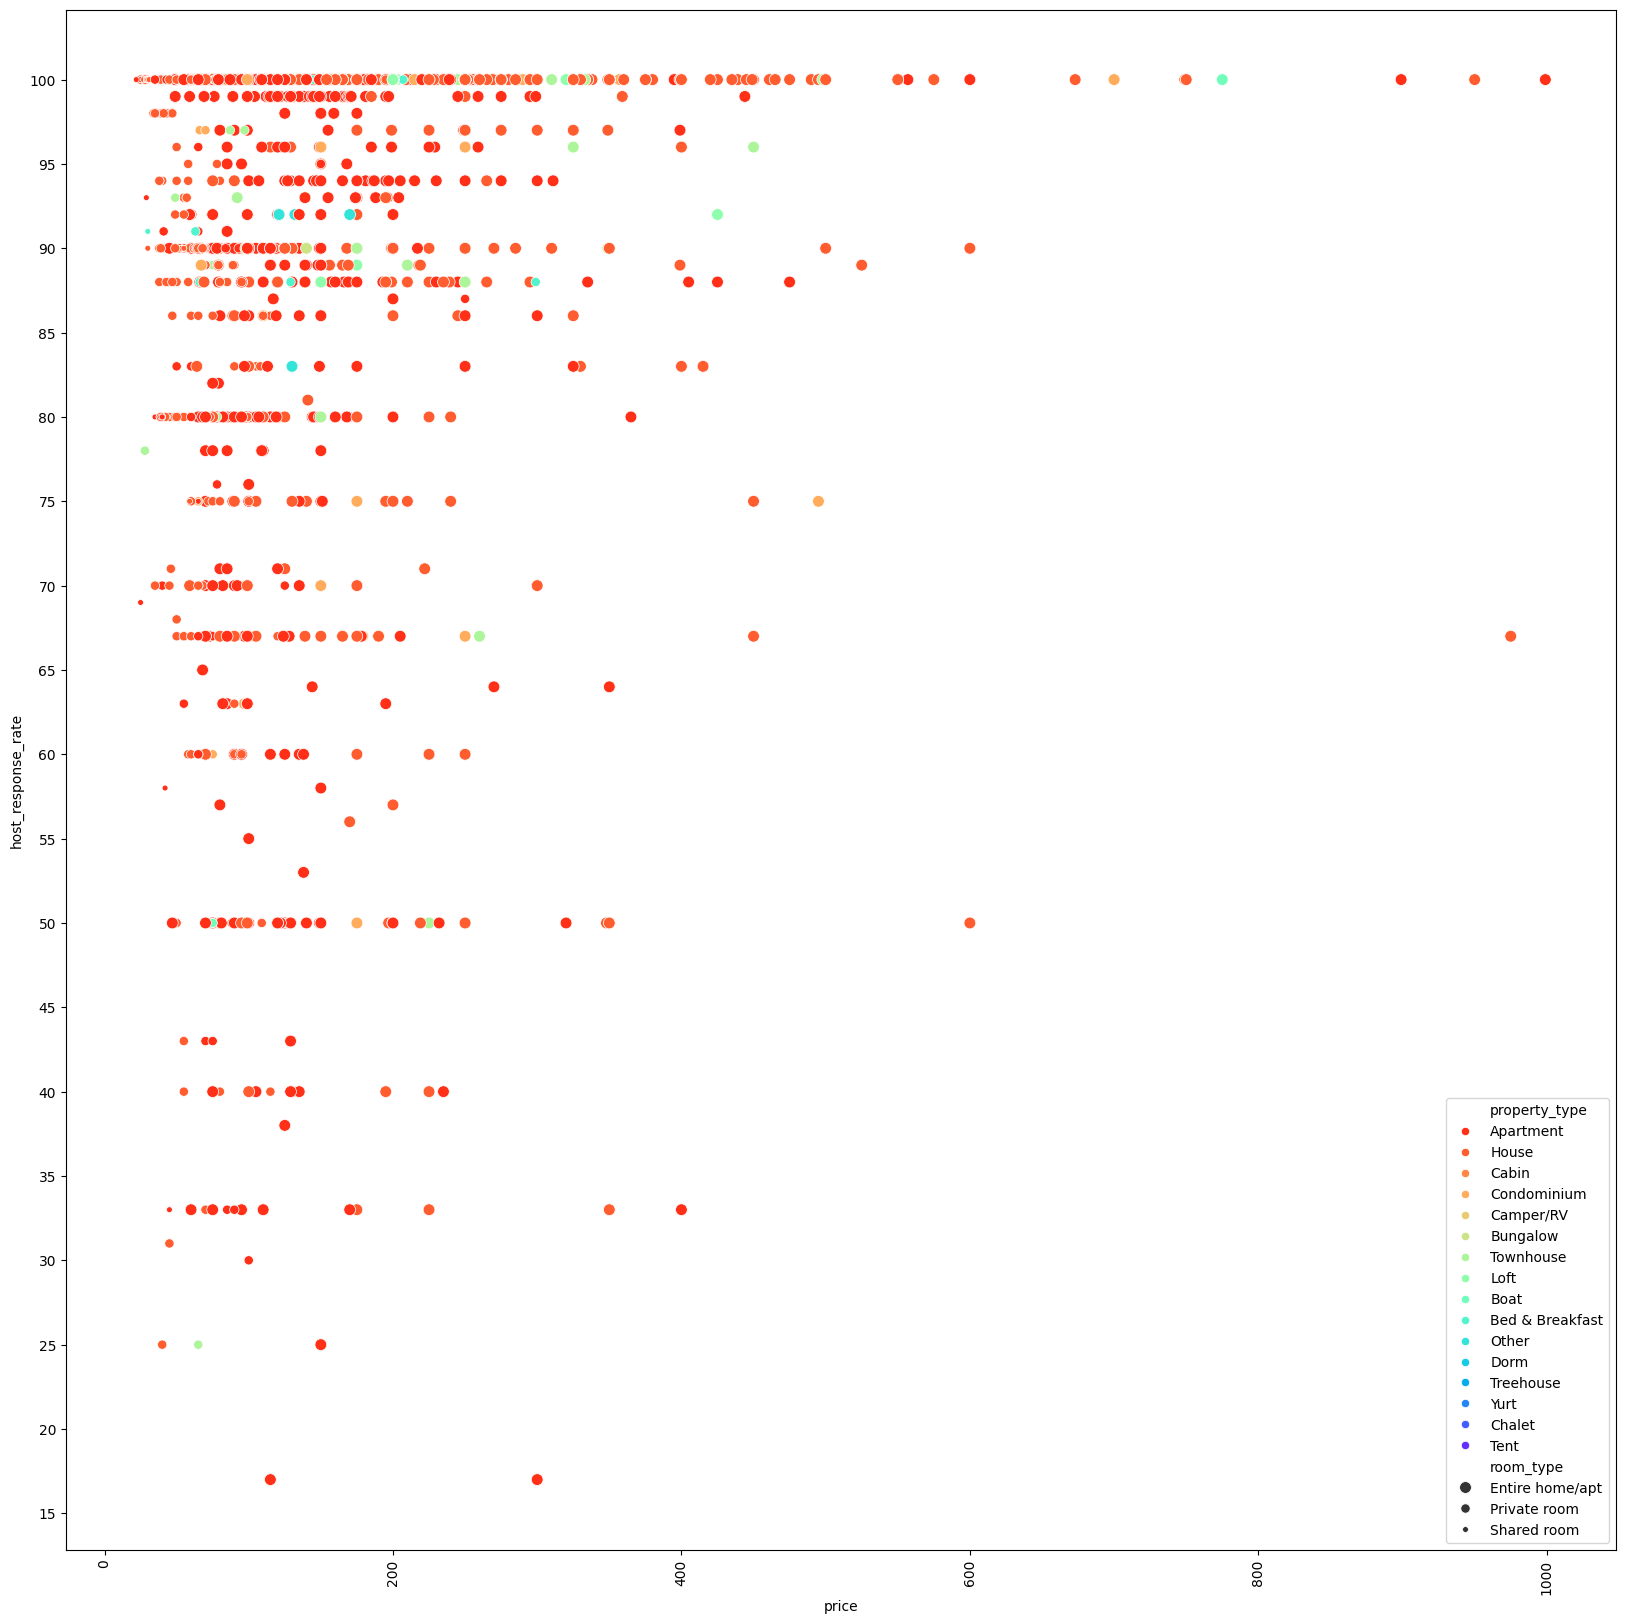

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='host_response_rate',x='price',size='room_type',hue='property_type',palette='rainbow_r',data=l_data)

Tingkat Respons Tuan Rumah sebagian besar adalah 100 % untuk 90% tempat.
Rumah dan Apartemen memiliki tingkat respons sekitar 100%.
Sedangkan sebaran Loft,Boat,Bunglow,Townhouse sebagian besar antara 90 - 95 %

Plotting number of property type and room type

In [ ]:
l_data['property_type'].value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='property_type'>

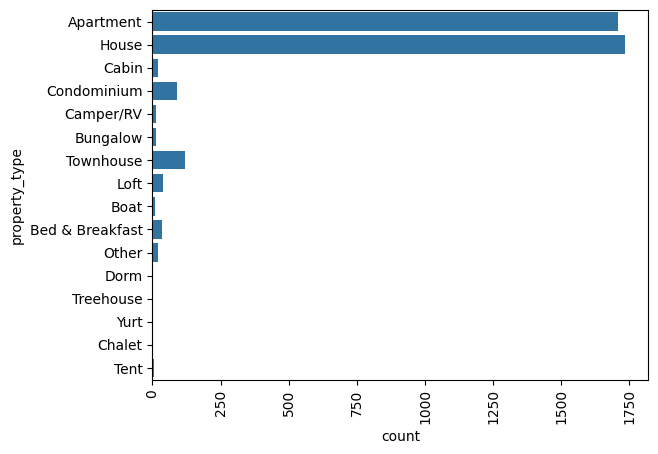

In [ ]:
plt.xticks(rotation=90)
sns.countplot(l_data['property_type'])

In [ ]:
l_data['room_type'].value_counts()

room_type
Entire home/apt    2541
Private room       1160
Shared room         117
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='room_type'>

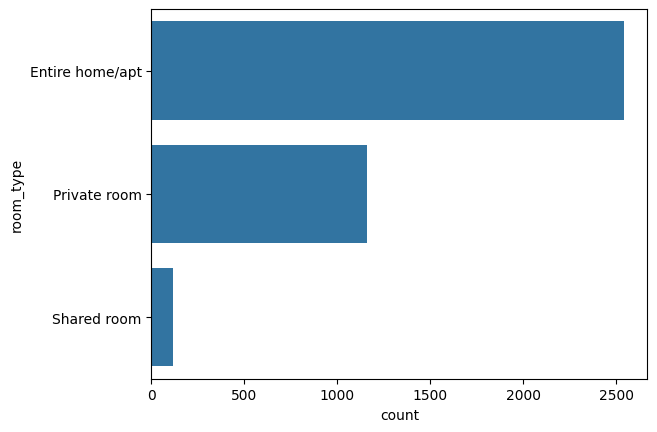

In [ ]:
sns.countplot(l_data['room_type'])

Kita melihat bahwa jumlah maksimum properti adalah Apartemen dan rumah diikuti oleh Townhouse dan Kondominium yang sangat rendah. Ini juga menunjukkan jenis properti di Seattle City.
Kita melihat bahwa jumlah maksimal listing adalah untuk Seluruh Kamar / Apartemen.

Analysing Review's of listings

Kami menganalisis Ulasan individu yang mengunjungi Seattle.

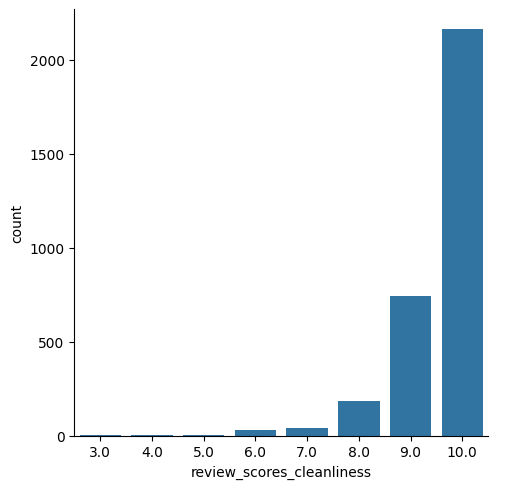

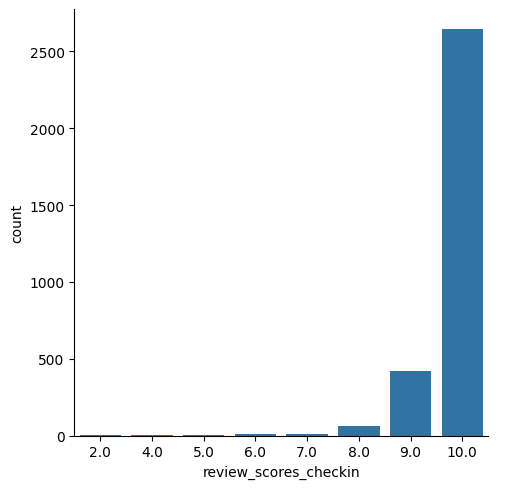

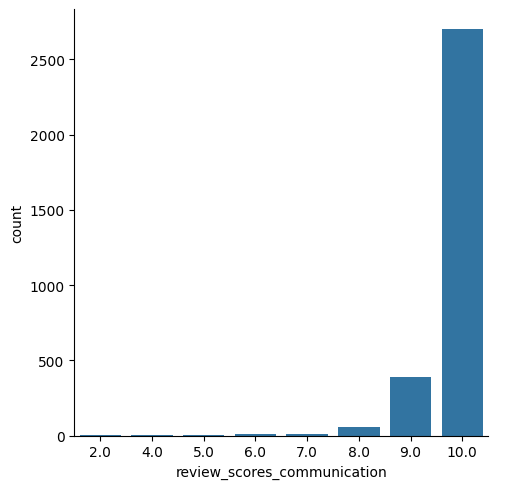

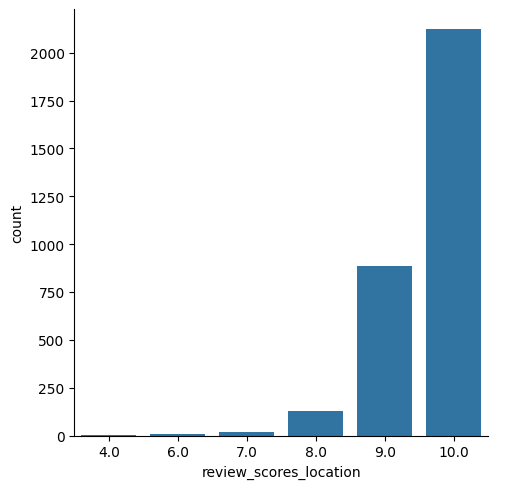

In [ ]:
review_cols = ['review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location']

for col in review_cols:
    sns.catplot(x=col, kind="count", data=l_data)
    plt.show()

Kami melihat sebagian besar ulasan berada di antara 9 -10 sehingga ini berarti memilih listingan dengan skor ulasan kurang dari 9 adalah tindakan yang tidak tepat.
dan angka yang kurang dari 8 tidak dapat diterima sama sekali.

Sebagai Superhost, Anda akan mendapatkan lebih banyak visibilitas, potensi penghasilan, dan imbalan eksklusif. Ini adalah cara kami mengucapkan terima kasih atas keramahtamahan Anda yang luar biasa. Cara menjadi Superhost: Setiap 3 bulan, kami memeriksa apakah Anda memenuhi kriteria berikut. Jika ya, Anda akan memperoleh atau mempertahankan status Superhost Anda. Superhost memiliki peringkat keseluruhan rata-rata 4,8 atau lebih tinggi berdasarkan ulasan dari setidaknya 50% tamu Airbnb mereka dalam satu tahun terakhir. Superhost telah menerima setidaknya 10 kali masa inap dalam setahun terakhir atau, jika mereka menerima reservasi jangka panjang, 100 malam selama minimal 3 kali menginap. Superhost tidak menerima pembatalan dalam satu tahun terakhir, kecuali ada keadaan yang meringankan. Superhost merespons 90% pesan baru dalam waktu 24 jam.

<Axes: xlabel='host_is_superhost', ylabel='no of listings'>

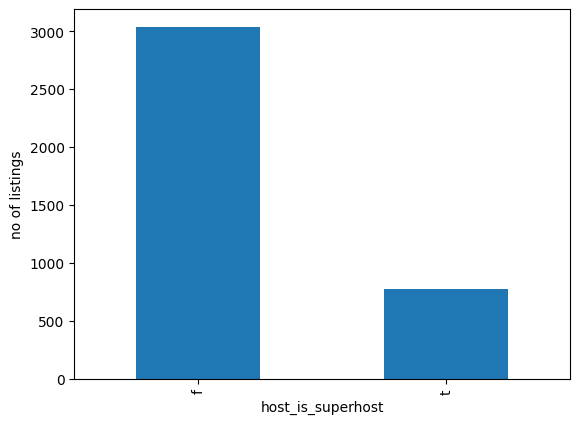

In [ ]:
plt.xlabel(['false','true'])

plt.ylabel('no of listings')

l_data['host_is_superhost'].value_counts().plot(kind='bar')

Sangat sedikit tempat yang merupakan Superhost, sekitar 17%, yang berarti tidak mudah untuk mendapatkan gelar ini dari AirBnB.

Whether a listing is instant bookable or not

<Axes: xlabel='instant_bookable', ylabel='No of listings'>

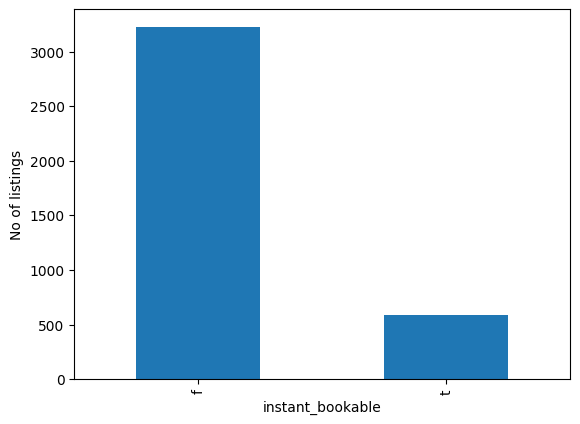

In [ ]:
plt.xlabel(['false','true'])

plt.ylabel('No of listings')

l_data['instant_bookable'].value_counts().plot(kind='bar')

sangat sedikit tempat yang bisa dipesan secara instan, sekitar 16% dari total.

cancellation policy of listings

<Axes: xlabel='cancellation_policy', ylabel='no of listings'>

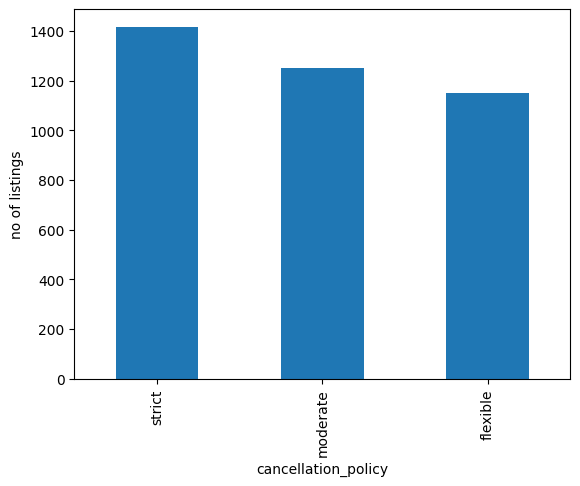

In [ ]:
plt.ylabel('no of listings')

l_data['cancellation_policy'].value_counts().plot(kind='bar')

Pembatalan properti biasanya didistribusikan secara merata secara ketat, moderat dan fleksibel dengan selisih 200.

Availability over 90 days vs cancellation policy instant bookable and host is superhost or not

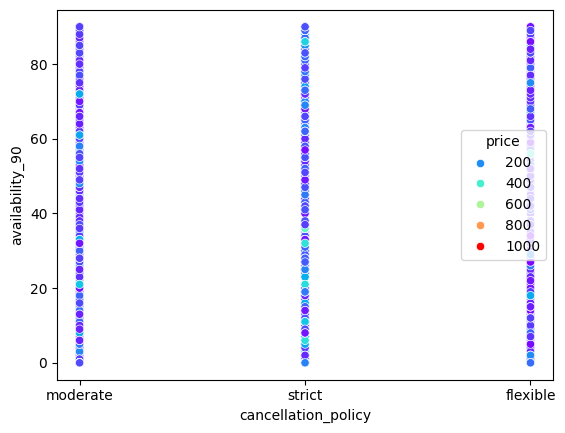

In [ ]:
sns.scatterplot(hue=l_data['price'], x=l_data['cancellation_policy'], y=l_data['availability_90'], palette='rainbow')
plt.show()

Ketersediaan tidak terpengaruh oleh kebijakan pembatalan karena kita melihat distribusi ketersediaan serupa dengan kebijakan pembatalan dan harga.

<Axes: xlabel='instant_bookable', ylabel='availability_90'>

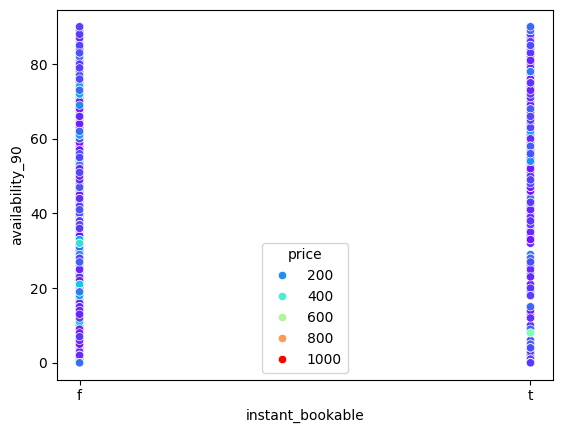

In [ ]:
sns.scatterplot(hue=l_data['price'],x=l_data['instant_bookable'],y=l_data['availability_90'],palette='rainbow')

Ketersediaan tidak terpengaruh oleh kebijakan pemesanan instan karena kami melihat distribusi ketersediaan yang serupa dengan kebijakan dan harga pemesanan instan.

Jadi ini mungkin alasan mengapa sangat sedikit listingan yang menawarkan fitur ini.

<Axes: xlabel='host_is_superhost', ylabel='availability_90'>

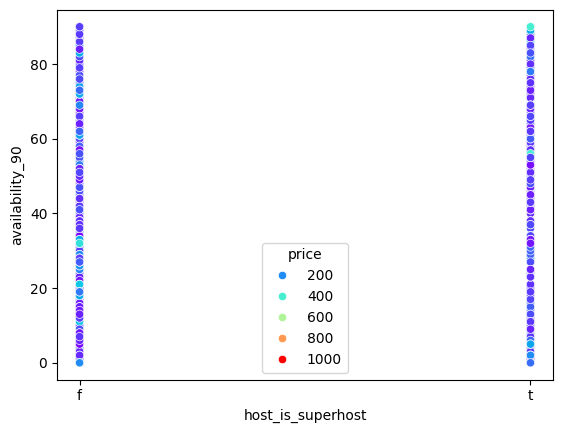

In [ ]:
sns.scatterplot(hue=l_data['price'],x=l_data['host_is_superhost'],y=l_data['availability_90'],palette='rainbow')

Meskipun kami melihat bahwa ketersediaan dipengaruhi secara negatif oleh fitur Superhost, biasanya listing dengan harga lebih tinggi kurang tersedia jika itu adalah Superhost.


Security checkings done of customers entering listings

<Axes: xlabel='count', ylabel='host_identity_verified'>

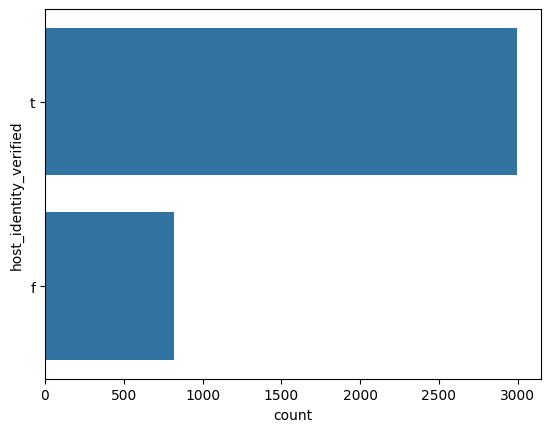

In [ ]:
sns.countplot(l_data['host_identity_verified'])

<Axes: xlabel='count', ylabel='requires_license'>

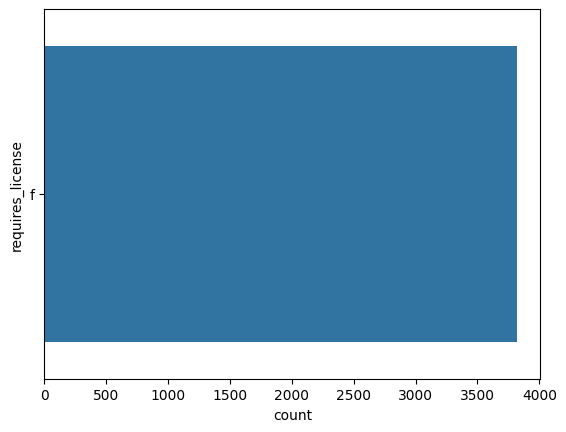

In [ ]:
sns.countplot(l_data['requires_license'])

<Axes: xlabel='count', ylabel='require_guest_profile_picture'>

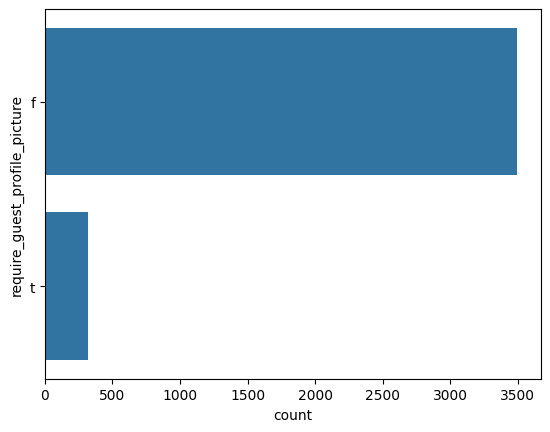

In [ ]:
sns.countplot(l_data['require_guest_profile_picture'])

<Axes: xlabel='count', ylabel='require_guest_phone_verification'>

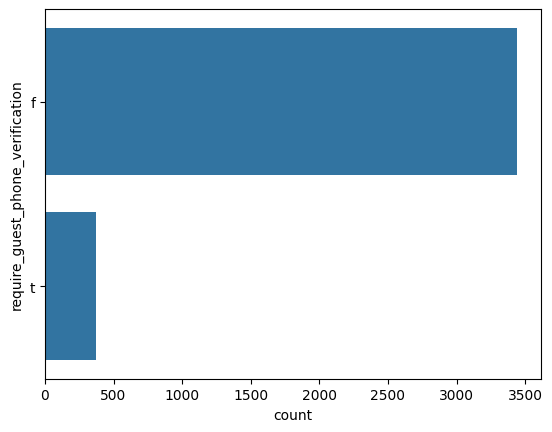

In [ ]:
sns.countplot(l_data['require_guest_phone_verification'])

Pemeriksaan keamanan masih menyisakan banyak hal yang diinginkan. Jadi area ini perlu ditingkatkan. Dan Perusahaan Daerah harus memperhatikan hal ini.

Finding correlation between avaibility over month year and quauter with price room type property type bed bedroom no and rating using heatmaps and corr function

In [ ]:
l_data_ay=l_data.sort_values('availability_365')

In [ ]:
l_data.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

<Axes: xlabel='price', ylabel='availability_365'>

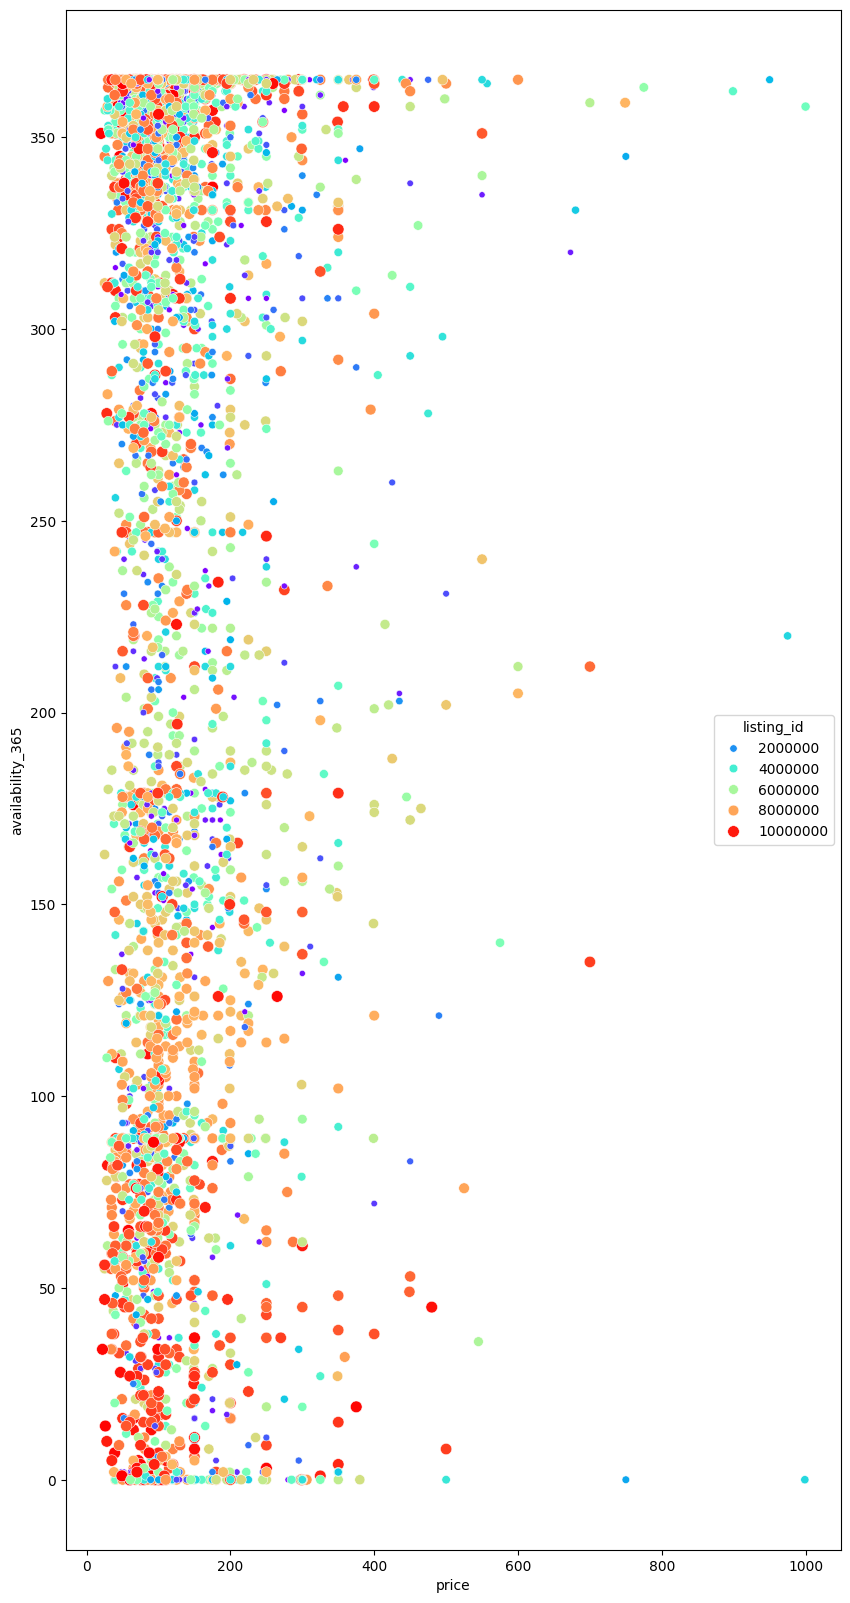

In [ ]:
plt.figure(figsize=(10,20))

sns.scatterplot(y='availability_365',x='price',data=l_data,hue='listing_id',palette='rainbow',size='listing_id')

In [ ]:
l_data[['availability_365','availability_90','availability_60','availability_30','price','monthly_price','weekly_price','review_scores_value','review_scores_rating']].corr()

availability_365  availability_90  availability_60  \
availability_365              1.000000         0.619355         0.572857   
availability_90               0.619355         1.000000         0.973353   
availability_60               0.572857         0.973353         1.000000   
availability_30               0.503881         0.875778         0.936122   
price                        -0.015550        -0.058810        -0.049336   
monthly_price                -0.033554        -0.007749         0.013794   
weekly_price                 -0.034907        -0.059254        -0.045516   
review_scores_value          -0.066565        -0.077367        -0.083797   
review_scores_rating         -0.038600        -0.038022        -0.048460   

                      availability_30     price  monthly_price  weekly_price  \
availability_365             0.503881 -0.015550      -0.033554     -0.034907   
availability_90              0.875778 -0.058810      -0.007749     -0.059254   
availability_60              0.936122 -0.049336       0.013794     -0.045516   
availability_30              1.000000 -0.037653       0.031131     -0.028811   
price                       -0.037653  1.000000       0.873450      0.937861   
monthly_price                0.031131  0.873450       1.000000      0.942644   
weekly_price                -0.028811  0.937861       0.942644      1.000000   
review_scores_value         -0.091919 -0.041776      -0.057232     -0.077420   
review_scores_rating        -0.051439  0.055551       0.048595      0.045262   

                      review_scores_value  review_scores_rating  
availability_365                -0.066565             -0.038600  
availability_90                 -0.077367             -0.038022  
availability_60                 -0.083797             -0.048460  
availability_30                 -0.091919             -0.051439  
price                           -0.041776              0.055551  
monthly_price                   -0.057232              0.048595  
weekly_price                    -0.077420              0.045262  
review_scores_value              1.000000              0.696534  
review_scores_rating             0.696534              1.000000

<Axes: >

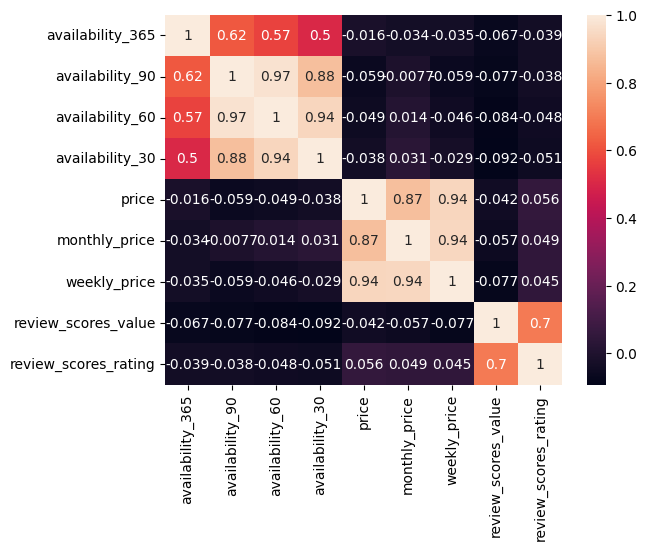

In [ ]:
sns.heatmap(
    l_data[['availability_365','availability_90','availability_60','availability_30','price','monthly_price',
            'weekly_price','review_scores_value','review_scores_rating']].corr(),annot=True
)

Tidak ada hubungan ketersediaan dengan tipe properti atau tipe kamar atau dengan fitur yang disediakan di kamar.

In [ ]:
l_data[['availability_30','availability_60','availability_90','availability_365','bathrooms','bedrooms','beds']].corr()

availability_30  availability_60  availability_90  \
availability_30          1.000000         0.936122         0.875778   
availability_60          0.936122         1.000000         0.973353   
availability_90          0.875778         0.973353         1.000000   
availability_365         0.503881         0.572857         0.619355   
bathrooms               -0.039447        -0.049399        -0.057346   
bedrooms                -0.076559        -0.090212        -0.103121   
beds                    -0.028571        -0.036433        -0.047570   

                  availability_365  bathrooms  bedrooms      beds  
availability_30           0.503881  -0.039447 -0.076559 -0.028571  
availability_60           0.572857  -0.049399 -0.090212 -0.036433  
availability_90           0.619355  -0.057346 -0.103121 -0.047570  
availability_365          1.000000  -0.002326 -0.049788 -0.009773  
bathrooms                -0.002326   1.000000  0.610937  0.532838  
bedrooms                 -0.049788   0.610937  1.000000  0.753167  
beds                     -0.009773   0.532838  0.753167  1.000000

<Axes: >

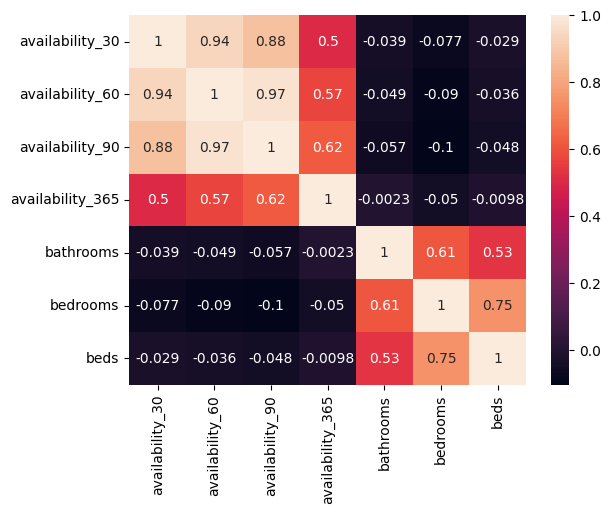

In [ ]:
numerical_cols = ['availability_30', 'availability_60', 'availability_90',
                  'availability_365', 'bathrooms', 'bedrooms', 'beds']
corr_matrix = l_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True)

Tidak ada hubungan ketersediaan dengan tipe properti atau tipe kamar atau dengan fitur yang disediakan di kamar.

<Axes: >

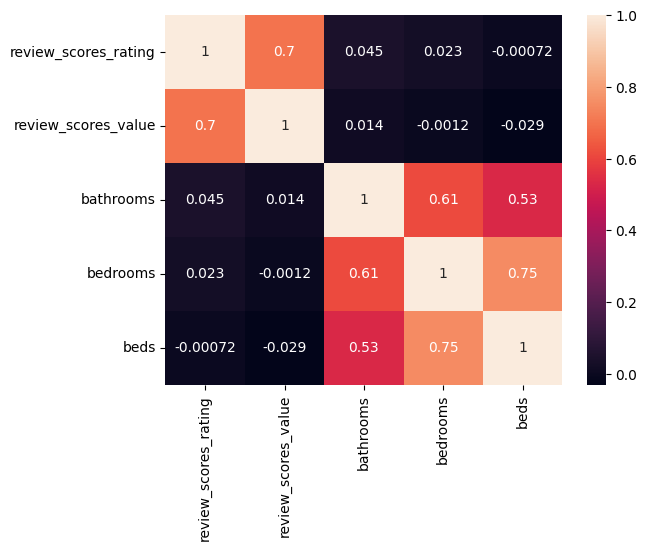

In [ ]:
numerical_cols = ['review_scores_rating', 'review_scores_value', 'bathrooms', 'bedrooms', 'beds']
corr_matrix = l_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True)

<Axes: >

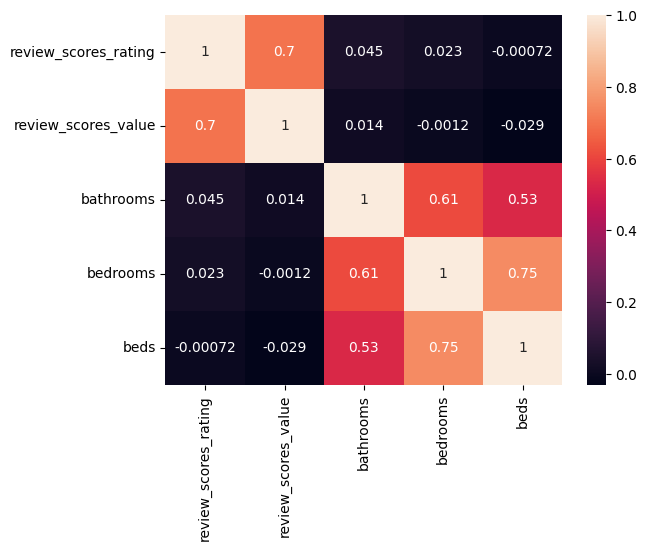

In [ ]:
numerical_cols = ['review_scores_rating', 'review_scores_value', 'bathrooms', 'bedrooms', 'beds']
corr_matrix = l_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True)

There is also not so siignificant relation between ratings and no of bed rooms and beds.

In [ ]:
l_data.head()

listing_id                           listing_url       scrape_id  \
0      241032   https://www.airbnb.com/rooms/241032  20160104002432   
1      953595   https://www.airbnb.com/rooms/953595  20160104002432   
2     3308979  https://www.airbnb.com/rooms/3308979  20160104002432   
3     7421966  https://www.airbnb.com/rooms/7421966  20160104002432   
4      278830   https://www.airbnb.com/rooms/278830  20160104002432   

  last_scraped                                 name  \
0   2016-01-04         Stylish Queen Anne Apartment   
1   2016-01-04   Bright & Airy Queen Anne Apartment   
2   2016-01-04  New Modern House-Amazing water view   
3   2016-01-04                   Queen Anne Chateau   
4   2016-01-04       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                         

No of listings over the months in 2015

In [ ]:
l_data[(l_data['year']==2015)]['month'].value_counts()

month
8.0     126
7.0     106
5.0      99
6.0      99
1.0      96
4.0      82
9.0      78
3.0      69
10.0     67
11.0     64
2.0      60
12.0     35
Name: count, dtype: int64

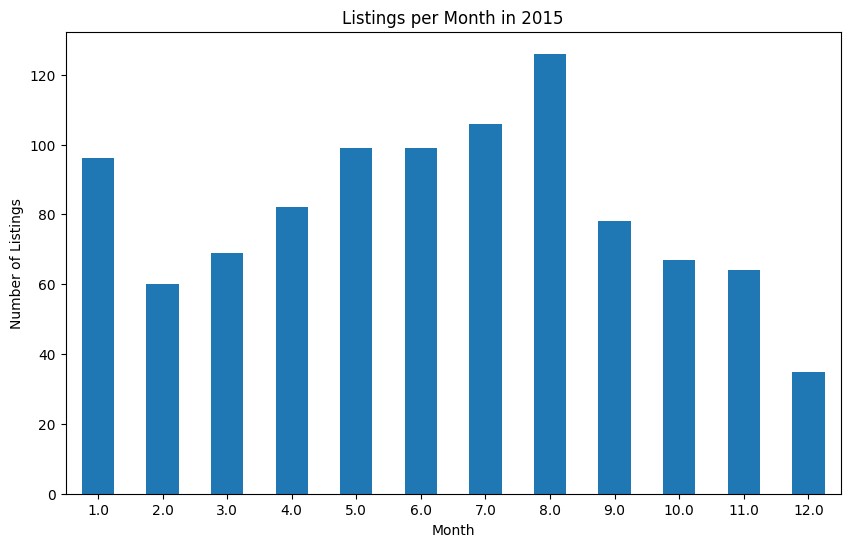

In [ ]:
plt.figure(figsize=(10, 6))
listings_per_month = l_data[l_data['year'] == 2015]['month'].value_counts().sort_index()
listings_per_month.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.title("Listings per Month in 2015")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Dalam kumpulan data listing kami mendapatkan bahwa sebagian besar data listing ada untuk tahun 2015. Jadi total jumlah listing pada tahun 2015 diplot. Yang nampaknya lebih tinggi pada bulan Juni, Juli, Agustus, kemudian terjadi penurunan jumlah listing hingga bulan Desember dan kemudian peningkatan yang sangat signifikan pada bulan Januari. Hal ini mungkin berarti bahwa bulan Oktober, November, Desember bukanlah bulan-bulan sibuk yang juga bertepatan dengan curah hujan lebat di wilayah ini.

Number of customers over the months of year 2016

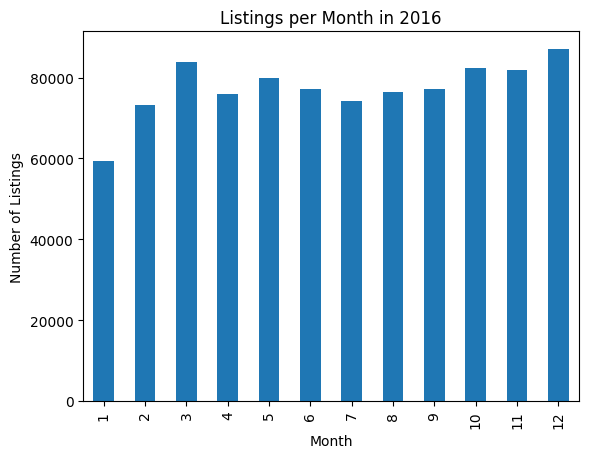

In [ ]:
c_data[c_data['year'] == 2016]['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.title("Listings per Month in 2016")
plt.show()

data pelanggan hanya tersedia untuk tahun 2016 di mana kami melihat bahwa jumlah pelanggan di seattle mendekati 60.000 - 80.000.

Sepanjang tahun 2016.

Average price over the months of year 2015 from listings data

<Axes: xlabel='month'>

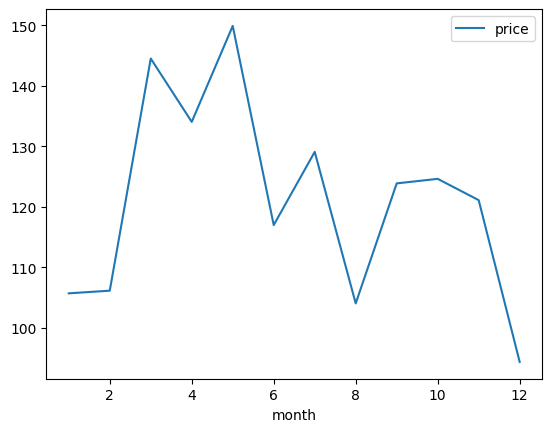

In [ ]:
sns.lineplot(data=pd.pivot_table(data=l_data[(l_data['year'] == 2015)],index='month',values='price',aggfunc='mean'))

adanya penurunan harga listing pada tahun 2015 pada bulan Januari, Juni, Juli, Agustus yang bertepatan dengan jumlah listing yang lebih banyak pada bulan-bulan tersebut.


Average price over the months in year 2016 from calendar data

<Axes: xlabel='month'>

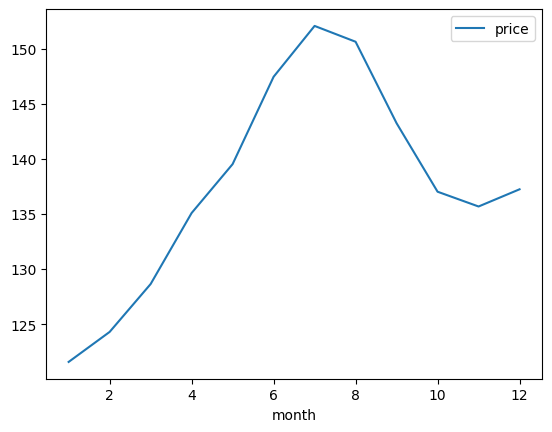

In [ ]:
sns.lineplot(data=pd.pivot_table(data=c_data[(c_data['year']==2016)],index='month',values='price',aggfunc='mean'))

Harga yang dibayar pelanggan pada bulan antara Juni hingga Agustus lebih tinggi. Jumlah listing pada tahun 2015 dan jumlah pelanggan yang berkunjung pada tahun 2016 juga tinggi. Jadi bulan-bulan ini sepertinya menjadi salah satu Tempat Wisata.

Sedangkan peningkatan penjualan pada bulan Desember dan Januari mungkin disebabkan oleh harga yang lebih rendah.

Availibility over the months in 2015

# **STAGE 01**

In [ ]:
!pip install gdown
import gdown
import pandas as pd
import os

In [ ]:
  # Import Dataset
dataset_link = 'https://drive.google.com/drive/folders/1wLAk6IsUNCWhGENAmAUnmXZxLiiv7m4q?usp=sharing'
gdown.download_folder(dataset_link, quiet=True, use_cookies=False)

# Path Dataset
path = '/content/Dataset/'

# Get the data from Dataset Folder
csv_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
dataframes = {}

# Load each CSV file into a DataFrame
for file_name in csv_files:
    base_name = os.path.basename(file_name).replace('.csv', '')
    print(f"Load Path: {file_name} into DataFrame: {base_name}..")

    # Load the file and store it
    dataframes[base_name] = pd.read_csv(file_name)

print("\nList Dataset")
print(dataframes.keys())

Load Path: /content/Dataset/listings.csv into DataFrame: listings..
Load Path: /content/Dataset/reviews.csv into DataFrame: reviews..
Load Path: /content/Dataset/calendar.csv into DataFrame: calendar..

List Dataset
dict_keys(['listings', 'reviews', 'calendar'])


# **1. Memuat dataset dari listings,calendar, dan reviews.**

In [ ]:
dataframes['calendar']

listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]

In [ ]:
info_df_calendar = dataframes['calendar'].info()
info_df_calendar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
dataframes['reviews']


listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  2015-07-19     28943674        Bianca   
1         7202016  39087409  2015-07-20     32440555         Frank   
2         7202016  39820030  2015-07-26     37722850           Ian   
3         7202016  40813543  2015-08-02     33671805        George   
4         7202016  41986501  2015-08-10     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  2015-10-12     37419458          Ryan   
84845     3624990  51024875  2015-10-17      6933252         Linda   
84846     3624990  51511988  2015-10-20     19543701         Jaime   
84847     3624990  52814482  2015-11-02     24445024        Jørgen   
84848     9727246  56429621  2015-12-13     30860360     Stephanie   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kelly has a great room in a very central locat...  
2      Very spacious apartment, and in a great neighb...  
3      Close to Seattle Center and all it has to offe...  
4      Kelly was a great host and very accommodating ...  
...                                                  ...  
84844  The description and pictures of the apartment ...  
84845  We had an excellent stay. It was clean and com...  
84846  Gran ubicación, cerca de todo lo atractivo del...  
84847  Very good apartement, clean and well sized. Si...  
84848  Breanne was a great host. Check in was easy, s...  

[84849 rows x 6 columns]

In [ ]:
info_df_calendar = dataframes['reviews'].info()
info_df_calendar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [ ]:
dataframes['listings']

id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish Queen Anne Apartment   
1      2016-01-04   Bright & Airy Queen Anne Apartment   
2      2016-01-04  New Modern House-Amazing water view   
3      2016-01-04                   Queen Anne Chateau   
4      2016-01-04       Charming craftsman 3 bdm house   
...           ...                                  ...   
3813   2016-01-04   3BR Mountain View House in Seattle   
3814   2016-01-04    Portage Bay View!-One Bedroom Apt   
3815   2016-01-04    Private apartment view of Lake WA   
3816   2016-01-04    Amazing View with Modern Comfort!   
3817   2016-01-04            Large Lakefront Apartment   

                                                summary  \
0                                                   NaN   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
0     Make your self at home in this charming one-be...   
1     Beautiful, hypoallergenic apartment in an extr...   
2     Our house is modern, light and fresh with a wa...   
3                                                   NaN   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
0     Make your self at home in this charming one-be...                none   
1     Chemically sensitive? We've removed the irrita...                none   
2     New modern house built in 2013.  Spectacular s...                none   
3     A charming apartment that sits atop Queen Anne...                none   
4     Cozy family craftman house in beautiful neighb...                none   
...                                                 ...                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  \
0           

In [ ]:
info_df_calendar = dataframes['listings'].info()
info_df_calendar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# **DATA QUALITY ASSESSMENT**
# (missing data, inconsistent, outlier)

2. Melakukan analisis kualitas data untuk mengevaluasi keakuratan data, outliers, dan missing values.

3. Mengimplementasikan pembersihan data sesuai kebutuhan (handling missing values, duplicates).

# **DATA INTEGRATION**
# (Definisikan masing-masing relasi untuk yang mendapatkan multi dataset)

4. Menggabungkan dataset listings, calendar, dan reviews untuk analisis holistik.

# **FEATURE ENGINEERING**
5. Buat fitur baru yang relevan untuk model berdasarkan analisis EDA.



# **EDA (Univarite, Bivariate, Multiviarate, Statistical Analysis)**
6. Melakukan analisis eksplorasi data (EDA) untuk menemukan wawasan awal dari dataset.

# **Table Profiling (Mendefinisikan masing-masing kolom pada table yang dipakai)**